In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import openpyxl
import fnmatch
import tensorflow as tf
import random
import datetime

from tensorflow.keras.models import load_model
from tensorflow.python.keras.optimizer_v2.rmsprop import RMSProp
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv, DataFrame, concat
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, RepeatVector, LSTM, Input, TimeDistributed, Activation, Dropout
from keras.optimizers import SGD
from pandas import read_csv
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer 
#from feature_engine import variable_transformers as vt
from scipy.stats import yeojohnson

np.set_printoptions(suppress=True)

SHIFT_DAYS   = 3
PRED_STEPS   = 48 #48hr * 10분단위 예측
TIME_STEPS   = SHIFT_DAYS*PRED_STEPS #hours step

START_DATE = '20200101'
END_DATE   = '20210704'
FILE_NAME  =  START_DATE+'_'+END_DATE


BASE_PATH = 'C:/elsys/solar/'

RSRS_IDX = 3
RSRSID_list=['RSRS0000000239', 'RSRS0000000241', 'RSRS0000000247', 'RSRS0000000249']
RSRS_SAVE_NM = RSRSID_list[RSRS_IDX][11:14]
CAPACITY_list = [89.7, 96,6, 90, 46.2]
CAPACITY     = RSRSID_list[RSRS_IDX]

SAVE_TOTAL_DIR = BASE_PATH + 'total_csv/'

# SENSOR DATA 통합 csv (1시간간격 mix)

In [108]:
# 1시간 단위
# solarradiation, uv 피쳐는 sum
# 나머지 피쳐들은 max

import csv
import json
import pandas as pd
import os
import glob
import datetime
import numpy as np
# .json -> .csv


SENSOR_CSV_NM='SENSOR_MIX(hourly)_'+START_DATE+'_'+END_DATE
base_dir        = 'C:/elsys/solar/'
sensor_dir      = base_dir + '_SENSOR/json'
save_dir        = base_dir + '_SENSOR/csv/'

column_list     = ['id','loc_oid','TIME','solarradiation','uv','temp','humidity','winddir','windspeed','windgust','dewpoint','maxdailygust','feelslike','hourlyrainin','dailyrainin','weeklyrainin','monthlyrainin','yearlyrainin']
err_file_size = []

json_pattern    = os.path.join(sensor_dir,'*.json')
file_list       = glob.glob(json_pattern)

#df = pd.DataFrame(columns=column_list)
total_df = pd.DataFrame(columns=column_list)
for file in file_list:
    with open(file) as json_file:
        #print(file)
        # parsing json file
        json_data = json.load(json_file)
        data = json_data['result']
        df = pd.DataFrame(columns=column_list)
        
        # 2. empty file check
        file_size = os.path.getsize(file)
        print(str(file_size)+'\t',end='')
        if file_size < 100:
            err_file_size.append(file + "/" + str(file_size))#err2
            continue
            
        __id              = []
        _loc_oid          = []
        _TIME             = []
        _solarradiation   = []
        _uv               = []
        _temp             = []
        _humidity         = []
        _winddir          = []
        _windspeed        = []
        _windgust         = []
        _dewpoint         = []
        _maxdailygust     = []
        _feelslike        = []
        _hourlyrainin     = []
        _dailyrainin      = []
        _weeklyrainin     = []
        _monthlyrainin    = []
        _yearlyrainin     = []
        
        _id              = []
        loc_oid          = []
        TIME             = []
        solarradiation   = []
        uv               = []
        temp             = []
        humidity         = []
        winddir          = []
        windspeed        = []
        windgust         = []
        dewpoint         = []
        maxdailygust     = []
        feelslike        = []
        hourlyrainin     = []
        dailyrainin      = []
        weeklyrainin     = []
        monthlyrainin    = []
        yearlyrainin     = []
        
        base_time = '00'
        for dataline in data:
            #print("base time: ", base_time, ", ", dataline['TIME'][11:13])
            #print("len(data): ",len(data))
            if base_time != dataline['TIME'][11:13]:
                base_time = dataline['TIME'][11:13]
                if len(__id) != 0:
                    _TIME = dataline['TIME'][:10]+' '+str(int(base_time)-1).zfill(2)#1~24 -> 0~23으로 변환(datetime포맷)
                    #base_time = dataline['TIME'][11:13]
                    _id.append(max(__id))
                    loc_oid.append(max(_loc_oid))
                    TIME.append(_TIME)
                    solarradiation.append(sum(_solarradiation))
                    uv.append(sum(_uv))
                    temp.append(max(_temp))
                    humidity.append(max(_humidity))
                    winddir.append(max(_winddir))
                    windspeed.append(max(_windspeed))
                    windgust.append(max(_windgust))
                    dewpoint.append(max(_dewpoint))
                    maxdailygust.append(max(_maxdailygust))
                    feelslike.append(max(_feelslike))
                    hourlyrainin.append(max(_hourlyrainin))
                    dailyrainin.append(max(_dailyrainin))
                    weeklyrainin.append(max(_weeklyrainin))
                    monthlyrainin.append(max(_monthlyrainin))
                    yearlyrainin.append(max(_yearlyrainin))
                    #print('_id:',_id)
        
                __id              = []
                _loc_oid          = []
                _TIME             = []
                _solarradiation   = []
                _uv               = []
                _temp             = []
                _humidity         = []
                _winddir          = []
                _windspeed        = []
                _windgust         = []
                _dewpoint         = []
                _maxdailygust     = []
                _feelslike        = []
                _hourlyrainin     = []
                _dailyrainin      = []
                _weeklyrainin     = []
                _monthlyrainin    = []
                _yearlyrainin     = []
            
            #print("len(data) == len(__id) : ",len(data),dataline['id'], max(_id))
            #if len(data) == dataline['id']:
                
            
            #print(dataline)
            __id.append(dataline['id'])
            _loc_oid.append(dataline['loc_oid'])
            _#TIME.append(dataline['TIME'])
            _solarradiation.append(dataline['solarradiation'])
            _uv.append(dataline['uv'])
            _temp.append(dataline['temp'])
            _humidity.append(dataline['humidity'])
            _winddir.append(dataline['winddir'])
            _windspeed.append(dataline['windspeed'])
            _windgust.append(dataline['windgust'])
            _dewpoint.append(dataline['dewpoint'])
            _maxdailygust.append(dataline['maxdailygust'])
            _feelslike.append(dataline['feelslike'])
            _hourlyrainin.append(dataline['hourlyrainin'])
            _dailyrainin.append(dataline['dailyrainin'])
            _weeklyrainin.append(dataline['weeklyrainin'])
            _monthlyrainin.append(dataline['monthlyrainin'])
            _yearlyrainin.append(dataline['yearlyrainin'])
            #print(__id, max(__id))
        #print(_id)
        
    base_time = str(int(dataline['TIME'][11:13])).zfill(2)#23시
    _TIME = dataline['TIME'][:10]+' '+base_time
    #base_time = dataline['TIME'][11:13]
    _id.append(max(__id))
    loc_oid.append(max(_loc_oid))
    TIME.append(_TIME)
    solarradiation.append(sum(_solarradiation))
    uv.append(sum(_uv))
    temp.append(max(_temp))
    humidity.append(max(_humidity))
    winddir.append(max(_winddir))
    windspeed.append(max(_windspeed))
    windgust.append(max(_windgust))
    dewpoint.append(max(_dewpoint))
    maxdailygust.append(max(_maxdailygust))
    feelslike.append(max(_feelslike))
    hourlyrainin.append(max(_hourlyrainin))
    dailyrainin.append(max(_dailyrainin))
    weeklyrainin.append(max(_weeklyrainin))
    monthlyrainin.append(max(_monthlyrainin))
    yearlyrainin.append(max(_yearlyrainin))
    
    #print(np.shape(_id))
    #print(df)
    df['id'] = _id
    df['loc_oid'] = loc_oid
    df['TIME'] = TIME
    df['solarradiation'] = solarradiation
    df['uv'] = uv
    df['temp'] = temp
    df['humidity'] = humidity
    df['winddir'] = winddir
    df['windspeed'] = windspeed
    df['windgust'] = windgust
    df['dewpoint'] = dewpoint
    df['maxdailygust'] = maxdailygust
    df['feelslike'] = feelslike
    df['hourlyrainin'] = hourlyrainin
    df['dailyrainin'] = dailyrainin
    df['weeklyrainin'] = weeklyrainin
    df['monthlyrainin'] = monthlyrainin
    df['yearlyrainin'] = yearlyrainin
    #display(df)
    #print(total_df.shape)
    #print(total_df.shape[0])
    
    total_df = pd.concat([total_df, df])#hrPow.append(filedata)

# save csv file
sensor_df = total_df.copy()
sensor_df['NEW_TIME'] = sensor_df['TIME'].str[0:4]+sensor_df['TIME'].str[5:7]+sensor_df['TIME'].str[8:10]+sensor_df['TIME'].str[11:13]
sensor_df = sensor_df[(sensor_df['NEW_TIME'].astype(str)>=(START_DATE+'00')) & (sensor_df['NEW_TIME'].astype(str)<=(END_DATE+'99'))]
sensor_df.insert(0, 'DATE', sensor_df['NEW_TIME'].values, True)
sensor_df.drop(['id','loc_oid', 'TIME', 'NEW_TIME'], axis=1, inplace=True)
sensor_df.to_csv(SAVE_TOTAL_DIR + SENSOR_CSV_NM+'.csv', index=False, header=True)
print('\n'+SAVE_TOTAL_DIR + SENSOR_CSV_NM+'.csv')
display(sensor_df)

print("\n-----------------------------------------------------------------")
print("\t FILE SIZE ERROR > file path / file size")
for f in err_file_size:
    print(f)

19854	46204	45504	44929	45565	45814	45920	46069	45619	45268	45299	45961	45130	45541	45106	44847	45514	45207	45785	46124	46130	45880	42422	45910	45252	45330	45467	45127	45198	45573	45960	45292	46068	46213	45765	44813	45568	45569	45289	45043	45385	39433	45394	46103	45788	45421	45199	46626	45791	45792	45275	46639	45970	45667	45979	45492	45403	45208	46164	46304	45607	45889	45587	45309	45389	44551	45785	45253	45953	45668	45697	46152	45818	45479	46393	46475	46389	45724	46251	46205	46137	44793	45163	45478	45194	46148	45862	45605	45316	45499	45760	45875	46305	46592	45439	45894	46244	46532	45869	46121	46099	45414	45882	45951	45858	45817	45750	46380	45458	45609	45931	45462	46540	46326	46188	45744	46140	45991	45512	46749	46214	46077	45532	45663	45476	45006	46643	46365	45600	46018	45664	45356	45744	45823	46825	45968	46224	45663	46589	46629	46401	46594	46088	46179	45848	45633	46378	46016	45862	45867	45275	45798	45687	46164	45490	45494	46475	46713	46996	46497	46058	46270	45630	45484	45800	45770	4570

,DATE,solarradiation,uv,temp,humidity,winddir,windspeed,windgust,dewpoint,maxdailygust,feelslike,hourlyrainin,dailyrainin,weeklyrainin,monthlyrainin,yearlyrainin
0,2021012813,296.03,2,5.111,73.0,205,2.190,3.308,0.672,14.484,4.889,0.0,0.000,12.192,12.192,12.192
1,2021012814,1186.46,8,5.389,67.0,346,5.722,10.013,-0.244,14.484,4.611,0.0,0.000,12.192,12.192,12.192
2,2021012815,1412.22,7,5.389,70.0,352,7.197,10.013,-1.822,14.484,3.900,0.0,0.000,12.192,12.192,12.192
3,2021012816,504.18,5,1.889,81.0,352,4.604,10.013,-1.022,14.484,1.889,0.0,0.000,12.192,12.192,12.192
4,2021012817,108.40,2,0.389,74.0,326,5.409,10.013,-4.072,14.484,0.111,0.0,0.000,12.192,12.192,12.192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,2021070419,15.58,0,21.722,96.0,305,0.000,0.000,20.883,6.705,22.433,0.0,6.604,6.604,120.904,802.386
20,2021070420,0.00,0,21.111,97.0,191,0.000,0.000,20.444,6.705,21.783,0.0,6.604,6.604,120.904,802.386
21,2021070421,0.00,0,20.611,97.0,233,0.000,0.000,20.117,6.705,21.261,0.0,6.604,6.604,120.904,802.386
22,2021070422,0.00,0,20.500,98.0,211,0.000,0.000,20.061,6.705,21.139,0.0,6.604,6.604,120.904,802.386



-----------------------------------------------------------------
	 FILE SIZE ERROR > file path / file size


# OMN power

In [109]:
import csv
import json
import pandas as pd
import os
import glob
import datetime
# .json -> .csv


RSRSID_list=['RSRS0000000239', 'RSRS0000000241', 'RSRS0000000247', 'RSRS0000000249']
err_file_size = []

for RSRSID in RSRSID_list:

    base_dir        = 'C:/elsys/solar/_ONM/json_'+ RSRSID
    save_dir        = 'C:/elsys/solar/_ONM/csv_'+ RSRSID+'/'
    print(base_dir)
    
    column_list=['COMPANY_NM','SET_GEN_NM','GEN_ID','GEN_NM','CBP_GEN_ID','CAPACITY','PATN_DT','HR_01','HR_02','HR_03','HR_04','HR_05','HR_06','HR_07','HR_08','HR_09','HR_10','HR_11','HR_12','HR_13','HR_14','HR_15','HR_16','HR_17','HR_18','HR_19','HR_20','HR_21','HR_22','HR_23','HR_24']
    COMPANY_NM=[]
    PATN_DT=[]
    GEN_NM=[]
    CBP_GEN_ID=[]
    SET_GEN_NM=[]
    CAPACITY=[]
    GEN_ID=[]
    HR_01=[]
    HR_02=[]
    HR_03=[]
    HR_04=[]
    HR_05=[]
    HR_06=[]
    HR_07=[]
    HR_08=[]
    HR_09=[]
    HR_10=[]
    HR_11=[]
    HR_12=[]
    HR_13=[]
    HR_14=[]
    HR_15=[]
    HR_16=[]
    HR_17=[]
    HR_18=[]
    HR_19=[]
    HR_20=[]
    HR_21=[]
    HR_22=[]
    HR_23=[]
    HR_24=[]

    json_pattern    = os.path.join(base_dir,'*.json')
    file_list       = glob.glob(json_pattern)
    #print(file_list)

    for file in file_list:
        with open(file, encoding='UTF-8') as json_file:
            #print(file)
            

            # parsing json file
            json_data = json.load(json_file)
            data = json_data['result']
            
            
            # 2. empty file check
            file_size = os.path.getsize(file)
            #print(file_size)
            if file_size < 100:
                err_file_size.append(file + "/" + str(file_size))#err2
                continue
                
                
            COMPANY_NM.append(data['COMPANY_NM'])
            SET_GEN_NM.append(data['SET_GEN_NM'])
            GEN_ID.append(data['GEN_ID'])
            GEN_NM.append(data['GEN_NM'])
            CBP_GEN_ID.append(data['CBP_GEN_ID'])
            CAPACITY.append(data['CAPACITY'])
            PATN_DT.append(data['PATN_DT'])
            HR_01.append(data['HR_01'])
            HR_02.append(data['HR_02'])
            HR_03.append(data['HR_03'])
            HR_04.append(data['HR_04'])
            HR_05.append(data['HR_05'])
            HR_06.append(data['HR_06'])
            HR_07.append(data['HR_07'])
            HR_08.append(data['HR_08'])
            HR_09.append(data['HR_09'])
            HR_10.append(data['HR_10'])
            HR_11.append(data['HR_11'])
            HR_12.append(data['HR_12'])
            HR_13.append(data['HR_13'])
            HR_14.append(data['HR_14'])
            HR_15.append(data['HR_15'])
            HR_16.append(data['HR_16'])
            HR_17.append(data['HR_17'])
            HR_18.append(data['HR_18'])
            HR_19.append(data['HR_19'])
            HR_20.append(data['HR_20'])
            HR_21.append(data['HR_21'])
            HR_22.append(data['HR_22'])
            HR_23.append(data['HR_23'])
            HR_24.append(data['HR_24'])
                    
    df = pd.DataFrame(columns=column_list)
    df['COMPANY_NM'] = COMPANY_NM
    df['SET_GEN_NM'] = SET_GEN_NM
    df['GEN_ID'] = GEN_ID
    df['GEN_NM'] = GEN_NM
    df['CBP_GEN_ID'] = CBP_GEN_ID
    df['CAPACITY'] = CAPACITY
    df['PATN_DT'] = PATN_DT
    df['HR_01'] = HR_01
    df['HR_02'] = HR_02
    df['HR_03'] = HR_03
    df['HR_04'] = HR_04
    df['HR_05'] = HR_05
    df['HR_06'] = HR_06
    df['HR_07'] = HR_07
    df['HR_08'] = HR_08
    df['HR_09'] = HR_09
    df['HR_10'] = HR_10
    df['HR_11'] = HR_11
    df['HR_12'] = HR_12
    df['HR_13'] = HR_13
    df['HR_14'] = HR_14
    df['HR_15'] = HR_15
    df['HR_16'] = HR_16
    df['HR_17'] = HR_17
    df['HR_18'] = HR_18
    df['HR_19'] = HR_19
    df['HR_20'] = HR_20
    df['HR_21'] = HR_21
    df['HR_22'] = HR_22
    df['HR_23'] = HR_23
    df['HR_24'] = HR_24
    df.sort_values('PATN_DT')
    
    # save csv file
    ONM_CSV_NM = 'ONM_' +RSRSID + '_' + df.iloc[0,6].replace("-","") + '_' + df.iloc[-1,6].replace("-","")
    df.to_csv(SAVE_TOTAL_DIR + '/ONM_daily/' + ONM_CSV_NM + 'daily.csv', index=False, header=True, encoding='CP949')
    print('\t'*5 + SAVE_TOTAL_DIR + ONM_CSV_NM)
    
    onm_df = df.copy()# 설비용량
    display(df)
    display(onm_df)
    capacity = onm_df['CAPACITY'].iloc[0]
    print(capacity)


    onm_df['NEW_DATE'] = onm_df['PATN_DT'].str[0:4]+onm_df['PATN_DT'].str[5:7]+onm_df['PATN_DT'].str[8:10]
    onm_df = onm_df[(onm_df['NEW_DATE'].astype(str).str[0:10]>=START_DATE) & (onm_df['NEW_DATE'].astype(str).str[0:10]<=END_DATE)]
    onm_df.insert(0, 'DATE', onm_df['NEW_DATE'].values, True)
    onm_df = onm_df.drop(['COMPANY_NM', 'SET_GEN_NM', 'GEN_ID', 'GEN_NM', 'CBP_GEN_ID','CAPACITY','NEW_DATE','PATN_DT'], axis=1)

    display(onm_df)
    
    onm_col_list = onm_df.columns
    onm_col_list = onm_col_list[1:]
    for col in onm_col_list:
        print(col[-2:]+'\',\'', end='')
        
        
    onm_df2 = pd.DataFrame(columns=['DATE','POWER'])
    print(onm_df.shape)

    for r in range(onm_df.shape[0]):
        #print(onm_df.iloc[r,0]+' ', end='')
        for c in range(1,onm_df.shape[1]):
            IDX = r*len(onm_col_list)+c-1
            TIME = onm_df.iloc[r,0]+str(int(onm_col_list[c-1][-2:])-1).zfill(2) #1~24 -> 0~23으로 변환(datetime포맷)
            POWER = onm_df.iloc[r,c]
            onm_df2.loc[IDX] = [TIME, POWER]

    display(onm_df2)      
    #onm_df2.to_csv(base_dir+"/_"+RSRSID_list[2]+"onm_df_"+save_name+"_1hour.csv",mode='w',index=False, encoding='CP949')
    onm_df2.to_csv(SAVE_TOTAL_DIR + ONM_CSV_NM + '.csv', index=False, header=True, encoding='CP949')
    print('\t'*5 + SAVE_TOTAL_DIR + ONM_CSV_NM)
    
print("-----------------------------------------------------------------")
print("\t FILE SIZE ERROR > file path / file size")
for f in err_file_size:
    print(f)


C:/elsys/solar/_ONM/json_RSRS0000000239
					C:/elsys/solar/total_csv/ONM_RSRS0000000239_20200101_20210719


,COMPANY_NM,SET_GEN_NM,GEN_ID,GEN_NM,CBP_GEN_ID,CAPACITY,PATN_DT,HR_01,HR_02,HR_03,...,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,HR_24
0,(주)엘시스,elsys0001,00234,쏠태양광발전소,AE96,89.7,2020-01-01,0.0,0.0,0.0,...,5.5,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,(주)엘시스,elsys0001,00234,쏠태양광발전소,AE96,89.7,2020-01-02,0.0,0.0,0.0,...,7.1,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,(주)엘시스,elsys0001,00234,쏠태양광발전소,AE96,89.7,2020-01-03,0.0,0.0,0.0,...,6.6,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(주)엘시스,elsys0001,00234,쏠태양광발전소,AE96,89.7,2020-01-04,0.0,0.0,0.0,...,7.0,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,(주)엘시스,elsys0001,00234,쏠태양광발전소,AE96,89.7,2020-01-05,0.0,0.0,0.0,...,8.9,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,(주)엘시스,elsys0001,00234,쏠태양광발전소,AE96,89.7,2021-07-15,0.0,0.0,0.0,...,37.8,59.9,25.5,7.7,1.9,0.4,0.0,0.0,0.0,0.0
560,(주)엘시스,elsys0001,00234,쏠태양광발전소,AE96,89.7,2021-07-16,0.0,0.0,0.0,...,28.7,26.0,2.5,3.0,1.9,0.0,0.0,0.0,0.0,0.0
561,(주)엘시스,elsys0001,00234,쏠태양광발전소,AE96,89.7,2021-07-17,0.0,0.0,0.0,...,44.2,50.2,29.6,12.3,7.8,0.2,0.0,0.0,0.0,0.0
562,(주)엘시스,elsys0001,00234,쏠태양광발전소,AE96,89.7,2021-07-18,0.0,0.0,0.0,...,40.8,23.6,13.9,9.9,3.3,0.5,0.0,0.0,0.0,0.0


,COMPANY_NM,SET_GEN_NM,GEN_ID,GEN_NM,CBP_GEN_ID,CAPACITY,PATN_DT,HR_01,HR_02,HR_03,...,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,HR_24
0,(주)엘시스,elsys0001,00234,쏠태양광발전소,AE96,89.7,2020-01-01,0.0,0.0,0.0,...,5.5,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,(주)엘시스,elsys0001,00234,쏠태양광발전소,AE96,89.7,2020-01-02,0.0,0.0,0.0,...,7.1,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,(주)엘시스,elsys0001,00234,쏠태양광발전소,AE96,89.7,2020-01-03,0.0,0.0,0.0,...,6.6,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(주)엘시스,elsys0001,00234,쏠태양광발전소,AE96,89.7,2020-01-04,0.0,0.0,0.0,...,7.0,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,(주)엘시스,elsys0001,00234,쏠태양광발전소,AE96,89.7,2020-01-05,0.0,0.0,0.0,...,8.9,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,(주)엘시스,elsys0001,00234,쏠태양광발전소,AE96,89.7,2021-07-15,0.0,0.0,0.0,...,37.8,59.9,25.5,7.7,1.9,0.4,0.0,0.0,0.0,0.0
560,(주)엘시스,elsys0001,00234,쏠태양광발전소,AE96,89.7,2021-07-16,0.0,0.0,0.0,...,28.7,26.0,2.5,3.0,1.9,0.0,0.0,0.0,0.0,0.0
561,(주)엘시스,elsys0001,00234,쏠태양광발전소,AE96,89.7,2021-07-17,0.0,0.0,0.0,...,44.2,50.2,29.6,12.3,7.8,0.2,0.0,0.0,0.0,0.0
562,(주)엘시스,elsys0001,00234,쏠태양광발전소,AE96,89.7,2021-07-18,0.0,0.0,0.0,...,40.8,23.6,13.9,9.9,3.3,0.5,0.0,0.0,0.0,0.0


89.7


,DATE,HR_01,HR_02,HR_03,HR_04,HR_05,HR_06,HR_07,HR_08,HR_09,...,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,HR_24
0,20200101,0.0,0.0,0.0,0.0,0.0,0.3,9.8,42.9,62.1,...,5.5,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20200102,0.0,0.0,0.0,0.0,0.0,0.1,7.9,35.3,48.4,...,7.1,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20200103,0.0,0.0,0.0,0.0,0.0,0.2,7.0,38.3,53.1,...,6.6,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20200104,0.0,0.0,0.0,0.0,0.0,0.1,7.8,23.3,37.1,...,7.0,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20200105,0.0,0.0,0.0,0.0,0.0,0.1,11.6,45.0,55.8,...,8.9,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,20210630,0.0,0.0,0.0,0.0,0.0,0.4,5.9,17.8,23.3,...,57.8,48.8,36.3,22.1,7.2,0.8,0.0,0.0,0.0,0.0
547,20210701,0.0,0.0,0.0,0.0,0.0,0.7,6.0,22.2,31.6,...,48.6,49.1,41.2,20.0,8.3,0.9,0.0,0.0,0.0,0.0
548,20210702,0.0,0.0,0.0,0.0,0.0,0.4,4.6,11.9,24.8,...,50.2,50.8,39.5,22.5,10.3,0.7,0.0,0.0,0.0,0.0
549,20210703,0.0,0.0,0.0,0.0,0.0,0.3,1.0,3.0,6.2,...,4.1,2.8,0.4,0.4,0.0,0.0,0.0,0.0,0.0,0.0


01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','(551, 25)


,DATE,POWER
0,2020010100,0.0
1,2020010101,0.0
2,2020010102,0.0
3,2020010103,0.0
4,2020010104,0.0
...,...,...
13219,2021070419,0.3
13220,2021070420,0.0
13221,2021070421,0.0
13222,2021070422,0.0


					C:/elsys/solar/total_csv/ONM_RSRS0000000239_20200101_20210719
C:/elsys/solar/_ONM/json_RSRS0000000241
					C:/elsys/solar/total_csv/ONM_RSRS0000000241_20200101_20210719


,COMPANY_NM,SET_GEN_NM,GEN_ID,GEN_NM,CBP_GEN_ID,CAPACITY,PATN_DT,HR_01,HR_02,HR_03,...,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,HR_24
0,(주)엘시스,elsys0001,00235,쏠2호태양광발전소,AE97,96.6,2020-01-01,0.0,0.0,0.0,...,25.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,(주)엘시스,elsys0001,00235,쏠2호태양광발전소,AE97,96.6,2020-01-02,0.0,0.0,0.0,...,20.0,10.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,(주)엘시스,elsys0001,00235,쏠2호태양광발전소,AE97,96.6,2020-01-03,0.0,0.0,0.0,...,25.0,10.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(주)엘시스,elsys0001,00235,쏠2호태양광발전소,AE97,96.6,2020-01-04,0.0,0.0,0.0,...,22.0,11.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,(주)엘시스,elsys0001,00235,쏠2호태양광발전소,AE97,96.6,2020-01-05,0.0,0.0,0.0,...,23.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,(주)엘시스,elsys0001,00235,쏠2호태양광발전소,AE97,96.6,2021-07-15,0.0,0.0,0.0,...,28.0,22.0,17.0,6.0,125925.0,125922.0,0.0,0.0,0.0,0.0
559,(주)엘시스,elsys0001,00235,쏠2호태양광발전소,AE97,96.6,2021-07-16,0.0,0.0,0.0,...,125960.0,125966.0,125957.0,125941.0,0.0,0.0,0.0,0.0,0.0,0.0
560,(주)엘시스,elsys0001,00235,쏠2호태양광발전소,AE97,96.6,2021-07-17,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
561,(주)엘시스,elsys0001,00235,쏠2호태양광발전소,AE97,96.6,2021-07-18,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,COMPANY_NM,SET_GEN_NM,GEN_ID,GEN_NM,CBP_GEN_ID,CAPACITY,PATN_DT,HR_01,HR_02,HR_03,...,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,HR_24
0,(주)엘시스,elsys0001,00235,쏠2호태양광발전소,AE97,96.6,2020-01-01,0.0,0.0,0.0,...,25.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,(주)엘시스,elsys0001,00235,쏠2호태양광발전소,AE97,96.6,2020-01-02,0.0,0.0,0.0,...,20.0,10.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,(주)엘시스,elsys0001,00235,쏠2호태양광발전소,AE97,96.6,2020-01-03,0.0,0.0,0.0,...,25.0,10.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(주)엘시스,elsys0001,00235,쏠2호태양광발전소,AE97,96.6,2020-01-04,0.0,0.0,0.0,...,22.0,11.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,(주)엘시스,elsys0001,00235,쏠2호태양광발전소,AE97,96.6,2020-01-05,0.0,0.0,0.0,...,23.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,(주)엘시스,elsys0001,00235,쏠2호태양광발전소,AE97,96.6,2021-07-15,0.0,0.0,0.0,...,28.0,22.0,17.0,6.0,125925.0,125922.0,0.0,0.0,0.0,0.0
559,(주)엘시스,elsys0001,00235,쏠2호태양광발전소,AE97,96.6,2021-07-16,0.0,0.0,0.0,...,125960.0,125966.0,125957.0,125941.0,0.0,0.0,0.0,0.0,0.0,0.0
560,(주)엘시스,elsys0001,00235,쏠2호태양광발전소,AE97,96.6,2021-07-17,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
561,(주)엘시스,elsys0001,00235,쏠2호태양광발전소,AE97,96.6,2021-07-18,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


96.6


,DATE,HR_01,HR_02,HR_03,HR_04,HR_05,HR_06,HR_07,HR_08,HR_09,...,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,HR_24
0,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,25.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,20.0,10.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,25.0,10.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,22.0,11.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,23.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,20210630,0.0,0.0,0.0,0.0,0.0,125701.0,3.0,8.0,11.0,...,30.0,26.0,21.0,12.0,5.0,125722.0,0.0,0.0,0.0,0.0
546,20210701,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,12.0,...,32.0,23.0,25.0,10.0,4.0,2.0,0.0,0.0,0.0,0.0
547,20210702,0.0,0.0,0.0,0.0,0.0,125745.0,2.0,5.0,11.0,...,20.0,22.0,14.0,12.0,5.0,125766.0,0.0,0.0,0.0,0.0
548,20210703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4.0,4.0,2.0,125768.0,125768.0,0.0,0.0,0.0,0.0,0.0


01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','(550, 25)


,DATE,POWER
0,2020010100,0.0
1,2020010101,0.0
2,2020010102,0.0
3,2020010103,0.0
4,2020010104,0.0
...,...,...
13195,2021070419,125776.0
13196,2021070420,0.0
13197,2021070421,0.0
13198,2021070422,0.0


					C:/elsys/solar/total_csv/ONM_RSRS0000000241_20200101_20210719
C:/elsys/solar/_ONM/json_RSRS0000000247
					C:/elsys/solar/total_csv/ONM_RSRS0000000247_20200101_20210719


,COMPANY_NM,SET_GEN_NM,GEN_ID,GEN_NM,CBP_GEN_ID,CAPACITY,PATN_DT,HR_01,HR_02,HR_03,...,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,HR_24
0,(주)엘시스,elsys0001,00236,쏠3호태양광발전소,AE98,90.0,2020-01-01,0.0,0.0,0.0,...,56.0,35.6,10.3,0.4,0.0,0.0,0.0,0.0,0.0,0.0
1,(주)엘시스,elsys0001,00236,쏠3호태양광발전소,AE98,90.0,2020-01-02,0.0,0.0,0.0,...,50.2,31.4,9.2,0.5,0.0,0.0,0.0,0.0,0.0,0.0
2,(주)엘시스,elsys0001,00236,쏠3호태양광발전소,AE98,90.0,2020-01-03,0.0,0.0,0.0,...,51.0,32.3,9.3,0.4,0.0,0.0,0.0,0.0,0.0,0.0
3,(주)엘시스,elsys0001,00236,쏠3호태양광발전소,AE98,90.0,2020-01-04,0.0,0.0,0.0,...,50.6,30.7,10.1,0.4,0.0,0.0,0.0,0.0,0.0,0.0
4,(주)엘시스,elsys0001,00236,쏠3호태양광발전소,AE98,90.0,2020-01-05,0.0,0.0,0.0,...,39.0,38.2,11.1,0.3,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,(주)엘시스,elsys0001,00236,쏠3호태양광발전소,AE98,90.0,2021-07-15,0.0,0.0,0.0,...,50.4,43.5,19.4,7.0,2.4,0.3,0.0,0.0,0.0,0.0
558,(주)엘시스,elsys0001,00236,쏠3호태양광발전소,AE98,90.0,2021-07-16,0.0,0.0,0.0,...,56.8,7.5,2.3,9.1,2.2,0.1,0.0,0.0,0.0,0.0
559,(주)엘시스,elsys0001,00236,쏠3호태양광발전소,AE98,90.0,2021-07-17,0.0,0.0,0.0,...,51.1,43.8,32.6,10.1,4.8,0.1,0.0,0.0,0.0,0.0
560,(주)엘시스,elsys0001,00236,쏠3호태양광발전소,AE98,90.0,2021-07-18,0.0,0.0,0.0,...,34.2,22.1,15.5,12.2,6.4,0.3,0.0,0.0,0.0,0.0


,COMPANY_NM,SET_GEN_NM,GEN_ID,GEN_NM,CBP_GEN_ID,CAPACITY,PATN_DT,HR_01,HR_02,HR_03,...,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,HR_24
0,(주)엘시스,elsys0001,00236,쏠3호태양광발전소,AE98,90.0,2020-01-01,0.0,0.0,0.0,...,56.0,35.6,10.3,0.4,0.0,0.0,0.0,0.0,0.0,0.0
1,(주)엘시스,elsys0001,00236,쏠3호태양광발전소,AE98,90.0,2020-01-02,0.0,0.0,0.0,...,50.2,31.4,9.2,0.5,0.0,0.0,0.0,0.0,0.0,0.0
2,(주)엘시스,elsys0001,00236,쏠3호태양광발전소,AE98,90.0,2020-01-03,0.0,0.0,0.0,...,51.0,32.3,9.3,0.4,0.0,0.0,0.0,0.0,0.0,0.0
3,(주)엘시스,elsys0001,00236,쏠3호태양광발전소,AE98,90.0,2020-01-04,0.0,0.0,0.0,...,50.6,30.7,10.1,0.4,0.0,0.0,0.0,0.0,0.0,0.0
4,(주)엘시스,elsys0001,00236,쏠3호태양광발전소,AE98,90.0,2020-01-05,0.0,0.0,0.0,...,39.0,38.2,11.1,0.3,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,(주)엘시스,elsys0001,00236,쏠3호태양광발전소,AE98,90.0,2021-07-15,0.0,0.0,0.0,...,50.4,43.5,19.4,7.0,2.4,0.3,0.0,0.0,0.0,0.0
558,(주)엘시스,elsys0001,00236,쏠3호태양광발전소,AE98,90.0,2021-07-16,0.0,0.0,0.0,...,56.8,7.5,2.3,9.1,2.2,0.1,0.0,0.0,0.0,0.0
559,(주)엘시스,elsys0001,00236,쏠3호태양광발전소,AE98,90.0,2021-07-17,0.0,0.0,0.0,...,51.1,43.8,32.6,10.1,4.8,0.1,0.0,0.0,0.0,0.0
560,(주)엘시스,elsys0001,00236,쏠3호태양광발전소,AE98,90.0,2021-07-18,0.0,0.0,0.0,...,34.2,22.1,15.5,12.2,6.4,0.3,0.0,0.0,0.0,0.0


90.0


,DATE,HR_01,HR_02,HR_03,HR_04,HR_05,HR_06,HR_07,HR_08,HR_09,...,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,HR_24
0,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,7.0,...,56.0,35.6,10.3,0.4,0.0,0.0,0.0,0.0,0.0,0.0
1,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,6.2,...,50.2,31.4,9.2,0.5,0.0,0.0,0.0,0.0,0.0,0.0
2,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,7.2,...,51.0,32.3,9.3,0.4,0.0,0.0,0.0,0.0,0.0,0.0
3,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,6.3,...,50.6,30.7,10.1,0.4,0.0,0.0,0.0,0.0,0.0,0.0
4,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,6.7,...,39.0,38.2,11.1,0.3,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,20210630,0.0,0.0,0.0,0.0,0.0,0.7,5.3,13.1,18.8,...,52.6,49.4,38.9,21.5,5.7,0.6,0.0,0.0,0.0,0.0
545,20210701,0.0,0.0,0.0,0.0,0.0,0.5,5.9,15.5,24.6,...,57.8,47.7,37.7,17.3,7.3,0.8,0.0,0.0,0.0,0.0
546,20210702,0.0,0.0,0.0,0.0,0.0,0.5,4.3,10.3,22.7,...,50.0,54.6,33.2,20.1,9.1,0.5,0.0,0.0,0.0,0.0
547,20210703,0.0,0.0,0.0,0.0,0.0,1.2,5.3,9.9,11.2,...,7.3,5.0,1.9,2.2,0.4,0.0,0.0,0.0,0.0,0.0


01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','(549, 25)


,DATE,POWER
0,2020010100,0.0
1,2020010101,0.0
2,2020010102,0.0
3,2020010103,0.0
4,2020010104,0.0
...,...,...
13171,2021070419,0.1
13172,2021070420,0.0
13173,2021070421,0.0
13174,2021070422,0.0


					C:/elsys/solar/total_csv/ONM_RSRS0000000247_20200101_20210719
C:/elsys/solar/_ONM/json_RSRS0000000249
					C:/elsys/solar/total_csv/ONM_RSRS0000000249_20200101_20210719


,COMPANY_NM,SET_GEN_NM,GEN_ID,GEN_NM,CBP_GEN_ID,CAPACITY,PATN_DT,HR_01,HR_02,HR_03,...,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,HR_24
0,(주)엘시스,elsys0001,00237,쏠4호태양광발전소,AE99,46.2,2020-01-01,0.0,0.0,0.0,...,25.0,18.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,(주)엘시스,elsys0001,00237,쏠4호태양광발전소,AE99,46.2,2020-01-02,0.0,0.0,0.0,...,21.0,14.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,(주)엘시스,elsys0001,00237,쏠4호태양광발전소,AE99,46.2,2020-01-03,0.0,0.0,0.0,...,21.0,16.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(주)엘시스,elsys0001,00237,쏠4호태양광발전소,AE99,46.2,2020-01-04,0.0,0.0,0.0,...,21.0,17.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,(주)엘시스,elsys0001,00237,쏠4호태양광발전소,AE99,46.2,2020-01-05,0.0,0.0,0.0,...,20.0,9.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,(주)엘시스,elsys0001,00237,쏠4호태양광발전소,AE99,46.2,2021-07-15,0.0,0.0,0.0,...,8.0,6.0,6.0,6.0,1.0,1.0,0.0,0.0,0.0,0.0
559,(주)엘시스,elsys0001,00237,쏠4호태양광발전소,AE99,46.2,2021-07-16,0.0,0.0,0.0,...,8.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560,(주)엘시스,elsys0001,00237,쏠4호태양광발전소,AE99,46.2,2021-07-17,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
561,(주)엘시스,elsys0001,00237,쏠4호태양광발전소,AE99,46.2,2021-07-18,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,COMPANY_NM,SET_GEN_NM,GEN_ID,GEN_NM,CBP_GEN_ID,CAPACITY,PATN_DT,HR_01,HR_02,HR_03,...,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,HR_24
0,(주)엘시스,elsys0001,00237,쏠4호태양광발전소,AE99,46.2,2020-01-01,0.0,0.0,0.0,...,25.0,18.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,(주)엘시스,elsys0001,00237,쏠4호태양광발전소,AE99,46.2,2020-01-02,0.0,0.0,0.0,...,21.0,14.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,(주)엘시스,elsys0001,00237,쏠4호태양광발전소,AE99,46.2,2020-01-03,0.0,0.0,0.0,...,21.0,16.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(주)엘시스,elsys0001,00237,쏠4호태양광발전소,AE99,46.2,2020-01-04,0.0,0.0,0.0,...,21.0,17.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,(주)엘시스,elsys0001,00237,쏠4호태양광발전소,AE99,46.2,2020-01-05,0.0,0.0,0.0,...,20.0,9.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,(주)엘시스,elsys0001,00237,쏠4호태양광발전소,AE99,46.2,2021-07-15,0.0,0.0,0.0,...,8.0,6.0,6.0,6.0,1.0,1.0,0.0,0.0,0.0,0.0
559,(주)엘시스,elsys0001,00237,쏠4호태양광발전소,AE99,46.2,2021-07-16,0.0,0.0,0.0,...,8.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560,(주)엘시스,elsys0001,00237,쏠4호태양광발전소,AE99,46.2,2021-07-17,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
561,(주)엘시스,elsys0001,00237,쏠4호태양광발전소,AE99,46.2,2021-07-18,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


46.2


,DATE,HR_01,HR_02,HR_03,HR_04,HR_05,HR_06,HR_07,HR_08,HR_09,...,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,HR_24
0,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,25.0,18.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,21.0,14.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,21.0,16.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,21.0,17.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,20.0,9.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,20210630,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,9.0,...,17.0,11.0,9.0,9.0,6.0,0.0,0.0,0.0,0.0,0.0
546,20210701,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,8.0,...,8.0,6.0,6.0,6.0,5.0,1.0,0.0,0.0,0.0,0.0
547,20210702,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,9.0,...,14.0,6.0,7.0,8.0,4.0,1.0,0.0,0.0,0.0,0.0
548,20210703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,3.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0


01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','(550, 25)


,DATE,POWER
0,2020010100,0.0
1,2020010101,0.0
2,2020010102,0.0
3,2020010103,0.0
4,2020010104,0.0
...,...,...
13195,2021070419,0.0
13196,2021070420,0.0
13197,2021070421,0.0
13198,2021070422,0.0


					C:/elsys/solar/total_csv/ONM_RSRS0000000249_20200101_20210719
-----------------------------------------------------------------
	 FILE SIZE ERROR > file path / file size
C:/elsys/solar/_ONM/json_RSRS0000000241\20201227.json/15
C:/elsys/solar/_ONM/json_RSRS0000000247\20201227.json/15
C:/elsys/solar/_ONM/json_RSRS0000000247\20201228.json/15
C:/elsys/solar/_ONM/json_RSRS0000000249\20201227.json/15


# # 종관기상관측 테스트

In [121]:
'''
# 종관기상관측 테스트

RSRS_IDX = 0
RSRSID = RSRSID_list[RSRS_IDX]
RSRS_SAVE_NM = RSRSID_list[RSRS_IDX][11:14]
ONM_CSV_NM = 'ONM_' +RSRSID + '_20200101_20210719'

# power
power_df = read_csv(SAVE_TOTAL_DIR + ONM_CSV_NM + '.csv', encoding='CP949', converters={'DATE':int})
weather_df = read_csv(SAVE_TOTAL_DIR + 'OBS_ASOS_TIM_20200101_20210704.csv', encoding='CP949', converters={'DATE':int})

display(power_df)
display(weather_df)

weather_df['일시']=weather_df['일시'].astype(str)

#일시 패턴 변환(2019-08-20 5:00 -> 2019082005)
weather_df['일시'] = weather_df['일시'].str[0:4]+weather_df['일시'].str[5:7]+weather_df['일시'].str[8:10]+weather_df['일시'].str[-5:-4].replace(" ","0")+weather_df['일시'].str[-4:-3]
power_df['DATE']=power_df['DATE'].astype(str)

df = power_df.merge(weather_df, left_on='DATE', right_on='일시', how='right', suffixes=(False, False))
print(df.columns)
features_selected = ['일시', 'POWER', '강수량(mm)', '풍속(m/s)',
       '습도(%)', '현지기압(hPa)', '일조(hr)', '전운량(10분위)', '시정(10m)', '지면온도(°C)']
df = df[features_selected]
df = df.rename(columns={'일시': 'DATE'})

display(df.corr())
df.to_csv(SAVE_TOTAL_DIR + RSRS_SAVE_NM+'_dataset0_'+START_DATE+'_'+END_DATE+'_ASOS.csv', index=False, header=True, encoding='CP949')
display(df)
print(SAVE_TOTAL_DIR + RSRS_SAVE_NM+'_dataset0_'+START_DATE+'_'+END_DATE+'_ASOS.csv')
'''

,DATE,POWER
0,2020010100,0.0
1,2020010101,0.0
2,2020010102,0.0
3,2020010103,0.0
4,2020010104,0.0
...,...,...
13219,2021070419,0.3
13220,2021070420,0.0
13221,2021070421,0.0
13222,2021070422,0.0


,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),전운량(10분위),시정(10m),지면온도(°C)
0,2020-01-01 0:00,-5.7,NaN,4.4,270.0,54.0,2.2,-13.5,1011.6,1033.0,NaN,NaN,0.0,1926.0,-5.0
1,2020-01-01 1:00,-5.9,NaN,4.4,270.0,51.0,2.0,-14.4,1011.7,1033.1,NaN,NaN,0.0,1972.0,-5.2
2,2020-01-01 2:00,-5.7,NaN,4.4,270.0,45.0,1.8,-15.7,1010.9,1032.3,NaN,NaN,0.0,1957.0,-5.3
3,2020-01-01 3:00,-5.9,NaN,4.8,290.0,47.0,1.8,-15.4,1011.4,1032.8,NaN,NaN,0.0,1985.0,-5.3
4,2020-01-01 4:00,-5.4,NaN,3.3,290.0,49.0,2.0,-14.4,1011.3,1032.7,NaN,NaN,0.0,1991.0,-4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13218,2021-07-04 19:00,23.1,NaN,1.9,270.0,86.0,24.3,20.6,989.5,1008.2,0.0,NaN,10.0,1991.0,22.4
13219,2021-07-04 20:00,22.7,NaN,0.3,0.0,87.0,24.0,20.4,989.6,1008.3,0.0,NaN,10.0,1870.0,21.8
13220,2021-07-04 21:00,21.9,NaN,0.2,0.0,92.0,24.1,20.5,990.5,1009.3,NaN,NaN,10.0,1647.0,21.4
13221,2021-07-04 22:00,21.3,NaN,0.1,0.0,95.0,24.0,20.4,990.9,1009.8,NaN,NaN,10.0,1539.0,20.7


Index(['DATE', 'POWER', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)',
       '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)',
       '일사(MJ/m2)', '전운량(10분위)', '시정(10m)', '지면온도(°C)'],
      dtype='object')


,POWER,강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),전운량(10분위),시정(10m),지면온도(°C)
POWER,1.000000,-0.108285,0.213610,-0.302041,0.077895,0.398812,-0.194254,0.176105,0.191749
강수량(mm),-0.108285,1.000000,0.147105,0.180764,-0.129584,-0.086260,0.108957,-0.231758,0.051679
풍속(m/s),0.213610,0.147105,1.000000,-0.577089,0.012989,0.402475,-0.126776,0.412312,0.040250
습도(%),-0.302041,0.180764,-0.577089,1.000000,-0.299969,-0.679184,0.336713,-0.651518,-0.066972
현지기압(hPa),0.077895,-0.129584,0.012989,-0.299969,1.000000,0.271034,-0.259628,0.199398,-0.634897
일조(hr),0.398812,-0.086260,0.402475,-0.679184,0.271034,1.000000,-0.647950,0.404026,0.177046
전운량(10분위),-0.194254,0.108957,-0.126776,0.336713,-0.259628,-0.647950,1.000000,-0.186269,0.108109
시정(10m),0.176105,-0.231758,0.412312,-0.651518,0.199398,0.404026,-0.186269,1.000000,0.026996
지면온도(°C),0.191749,0.051679,0.040250,-0.066972,-0.634897,0.177046,0.108109,0.026996,1.000000


,DATE,POWER,강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),전운량(10분위),시정(10m),지면온도(°C)
0,2020010100,0.0,NaN,4.4,54.0,1011.6,NaN,0.0,1926.0,-5.0
1,2020010101,0.0,NaN,4.4,51.0,1011.7,NaN,0.0,1972.0,-5.2
2,2020010102,0.0,NaN,4.4,45.0,1010.9,NaN,0.0,1957.0,-5.3
3,2020010103,0.0,NaN,4.8,47.0,1011.4,NaN,0.0,1985.0,-5.3
4,2020010104,0.0,NaN,3.3,49.0,1011.3,NaN,0.0,1991.0,-4.8
...,...,...,...,...,...,...,...,...,...,...
13218,2021070419,0.3,NaN,1.9,86.0,989.5,0.0,10.0,1991.0,22.4
13219,2021070420,0.0,NaN,0.3,87.0,989.6,0.0,10.0,1870.0,21.8
13220,2021070421,0.0,NaN,0.2,92.0,990.5,NaN,10.0,1647.0,21.4
13221,2021070422,0.0,NaN,0.1,95.0,990.9,NaN,10.0,1539.0,20.7


C:/elsys/solar/total_csv/239_dataset0_20200101_20210704_ASOS.csv


# ################################################################################## RSRS_IDX 조절

In [87]:
RSRS_IDX = 3
RSRSID = RSRSID_list[RSRS_IDX]
RSRS_SAVE_NM = RSRSID_list[RSRS_IDX][11:14]
ONM_CSV_NM = 'ONM_' +RSRSID + '_' + df.iloc[0,6].replace("-","") + '_' + df.iloc[-1,6].replace("-","")

In [88]:
# power
power_df = read_csv(SAVE_TOTAL_DIR + ONM_CSV_NM + '.csv', encoding='CP949', converters={'DATE':int})
weather_df = read_csv(SAVE_TOTAL_DIR + SENSOR_CSV_NM+'.csv', encoding='CP949', converters={'DATE':int})


In [89]:
weather_df['DATE']=weather_df['DATE'].astype(str)
power_df['DATE']=power_df['DATE'].astype(str)

df = power_df.merge(weather_df, left_on='DATE', right_on='DATE', how='left', suffixes=(False, False))
df.to_csv(BASE_PATH+'_MERGE_'+ SENSOR_CSV_NM + '_power_weather.csv', encoding='CP949',mode='w',index=False)
display(df)

,DATE,POWER,solarradiation,uv,temp,humidity,winddir,windspeed,windgust,dewpoint,maxdailygust,feelslike,hourlyrainin,dailyrainin,weeklyrainin,monthlyrainin,yearlyrainin
0,2021012900,0.0,0.00,0.0,-4.722,77.0,331.0,3.979,7.778,-8.128,11.086,-7.339,0.0,0.000,12.192,12.192,12.192
1,2021012901,0.0,0.00,0.0,-4.889,85.0,353.0,4.604,6.705,-7.394,11.086,-5.389,0.0,0.000,12.192,12.192,12.192
2,2021012902,0.0,0.00,0.0,-5.278,78.0,358.0,4.381,8.896,-8.500,11.086,-5.278,0.0,0.000,12.192,12.192,12.192
3,2021012903,0.0,0.00,0.0,-5.500,78.0,357.0,4.113,5.498,-8.717,11.086,-5.500,0.0,0.000,12.192,12.192,12.192
4,2021012904,0.0,0.00,0.0,-5.778,76.0,351.0,2.995,5.498,-9.317,11.086,-9.194,0.0,0.000,12.192,12.192,12.192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3763,2021070419,0.0,15.58,0.0,21.722,96.0,305.0,0.000,0.000,20.883,6.705,22.433,0.0,6.604,6.604,120.904,802.386
3764,2021070420,0.0,0.00,0.0,21.111,97.0,191.0,0.000,0.000,20.444,6.705,21.783,0.0,6.604,6.604,120.904,802.386
3765,2021070421,0.0,0.00,0.0,20.611,97.0,233.0,0.000,0.000,20.117,6.705,21.261,0.0,6.604,6.604,120.904,802.386
3766,2021070422,0.0,0.00,0.0,20.500,98.0,211.0,0.000,0.000,20.061,6.705,21.139,0.0,6.604,6.604,120.904,802.386


In [90]:
# 10, 17 시
T_PRED1 = '10'
T_PRED2 = '17'

# 전력랑 발생하는 시간만 추출
# 쏠1: 04~20
# 쏠2: 05~20
# 쏠3: 05~20
# 쏠4: 06~20
T_SUNRISE = '04' #05<시간
T_SUNSET  = '20' #시간<21

# 1차 예측
ds1 = df.copy()
ds1 = ds1[ds1['DATE'].astype(str) < (ds1.iloc[-1,0][:-2]+str(T_PRED1))]
ds2 = ds1[(ds1['DATE'].astype(str).str[-2:]<T_SUNSET) & (ds1['DATE'].astype(str).str[-2:]>T_SUNRISE)]
display(ds1)
display(ds2)

# 2차 예측
ds3 = df.copy()
ds3 = ds3[ds3['DATE'].astype(str) < (ds3.iloc[-1,0][:-2]+str(T_PRED2))]
ds4 = ds3[(ds3['DATE'].astype(str).str[-2:]<T_SUNSET) & (ds3['DATE'].astype(str).str[-2:]>T_SUNRISE)]
display(ds3)
display(ds4)

# save csv
print(SAVE_TOTAL_DIR + RSRS_SAVE_NM+'_dataset0_'+START_DATE+'_'+END_DATE+'.csv')
df.to_csv(SAVE_TOTAL_DIR + RSRS_SAVE_NM+'_dataset0_'+START_DATE+'_'+END_DATE+'.csv', index=False, header=True, encoding='CP949')
ds1.to_csv(SAVE_TOTAL_DIR + RSRS_SAVE_NM+'_dataset1_'+START_DATE+'_'+END_DATE+'.csv', index=False, header=True, encoding='CP949')
ds2.to_csv(SAVE_TOTAL_DIR + RSRS_SAVE_NM+'_dataset2_'+START_DATE+'_'+END_DATE+'.csv', index=False, header=True, encoding='CP949')
ds3.to_csv(SAVE_TOTAL_DIR + RSRS_SAVE_NM+'_dataset3_'+START_DATE+'_'+END_DATE+'.csv', index=False, header=True, encoding='CP949')
ds4.to_csv(SAVE_TOTAL_DIR + RSRS_SAVE_NM+'_dataset4_'+START_DATE+'_'+END_DATE+'.csv', index=False, header=True, encoding='CP949')

,DATE,POWER,solarradiation,uv,temp,humidity,winddir,windspeed,windgust,dewpoint,maxdailygust,feelslike,hourlyrainin,dailyrainin,weeklyrainin,monthlyrainin,yearlyrainin
0,2021012900,0.0,0.00,0.0,-4.722,77.0,331.0,3.979,7.778,-8.128,11.086,-7.339,0.0,0.000,12.192,12.192,12.192
1,2021012901,0.0,0.00,0.0,-4.889,85.0,353.0,4.604,6.705,-7.394,11.086,-5.389,0.0,0.000,12.192,12.192,12.192
2,2021012902,0.0,0.00,0.0,-5.278,78.0,358.0,4.381,8.896,-8.500,11.086,-5.278,0.0,0.000,12.192,12.192,12.192
3,2021012903,0.0,0.00,0.0,-5.500,78.0,357.0,4.113,5.498,-8.717,11.086,-5.500,0.0,0.000,12.192,12.192,12.192
4,2021012904,0.0,0.00,0.0,-5.778,76.0,351.0,2.995,5.498,-9.317,11.086,-9.194,0.0,0.000,12.192,12.192,12.192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3749,2021070405,0.0,55.49,0.0,22.611,93.0,241.0,0.894,2.190,21.311,6.705,23.278,0.0,5.588,5.588,119.888,801.624
3750,2021070406,0.0,415.62,3.0,23.000,90.0,254.0,1.788,2.190,20.667,6.705,23.600,0.0,5.588,5.588,119.888,801.624
3751,2021070407,5.0,1070.92,9.0,23.500,86.0,276.0,1.296,2.190,20.906,6.705,24.072,0.0,5.588,5.588,119.888,801.624
3752,2021070408,6.0,1102.99,12.0,24.389,83.0,276.0,2.593,4.381,20.711,6.705,24.944,0.0,5.588,5.588,119.888,801.624


,DATE,POWER,solarradiation,uv,temp,humidity,winddir,windspeed,windgust,dewpoint,maxdailygust,feelslike,hourlyrainin,dailyrainin,weeklyrainin,monthlyrainin,yearlyrainin
5,2021012905,0.0,0.00,0.0,-5.889,77.0,351.0,3.219,5.498,-9.261,11.086,-5.889,0.0,0.000,12.192,12.192,12.192
6,2021012906,0.0,0.00,0.0,-5.889,76.0,341.0,5.990,8.896,-9.428,11.086,-8.672,0.0,0.000,12.192,12.192,12.192
7,2021012907,0.0,39.40,0.0,-6.000,77.0,349.0,4.604,6.705,-9.478,11.086,-6.111,0.0,0.000,12.192,12.192,12.192
8,2021012908,3.0,365.12,6.0,-6.222,76.0,345.0,1.520,3.308,-9.911,11.086,-6.222,0.0,0.000,12.192,12.192,12.192
9,2021012909,10.0,620.19,8.0,-4.889,73.0,342.0,2.503,4.381,-9.506,11.086,-4.889,0.0,0.000,12.192,12.192,12.192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3749,2021070405,0.0,55.49,0.0,22.611,93.0,241.0,0.894,2.190,21.311,6.705,23.278,0.0,5.588,5.588,119.888,801.624
3750,2021070406,0.0,415.62,3.0,23.000,90.0,254.0,1.788,2.190,20.667,6.705,23.600,0.0,5.588,5.588,119.888,801.624
3751,2021070407,5.0,1070.92,9.0,23.500,86.0,276.0,1.296,2.190,20.906,6.705,24.072,0.0,5.588,5.588,119.888,801.624
3752,2021070408,6.0,1102.99,12.0,24.389,83.0,276.0,2.593,4.381,20.711,6.705,24.944,0.0,5.588,5.588,119.888,801.624


,DATE,POWER,solarradiation,uv,temp,humidity,winddir,windspeed,windgust,dewpoint,maxdailygust,feelslike,hourlyrainin,dailyrainin,weeklyrainin,monthlyrainin,yearlyrainin
0,2021012900,0.0,0.00,0.0,-4.722,77.0,331.0,3.979,7.778,-8.128,11.086,-7.339,0.0,0.000,12.192,12.192,12.192
1,2021012901,0.0,0.00,0.0,-4.889,85.0,353.0,4.604,6.705,-7.394,11.086,-5.389,0.0,0.000,12.192,12.192,12.192
2,2021012902,0.0,0.00,0.0,-5.278,78.0,358.0,4.381,8.896,-8.500,11.086,-5.278,0.0,0.000,12.192,12.192,12.192
3,2021012903,0.0,0.00,0.0,-5.500,78.0,357.0,4.113,5.498,-8.717,11.086,-5.500,0.0,0.000,12.192,12.192,12.192
4,2021012904,0.0,0.00,0.0,-5.778,76.0,351.0,2.995,5.498,-9.317,11.086,-9.194,0.0,0.000,12.192,12.192,12.192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3756,2021070412,14.0,2207.77,17.0,27.000,76.0,290.0,1.788,3.308,22.289,6.705,29.156,0.0,5.588,5.588,119.888,801.624
3757,2021070413,6.0,1318.63,11.0,26.000,78.0,330.0,0.492,1.118,21.589,6.705,26.617,0.0,5.588,5.588,119.888,801.624
3758,2021070414,11.0,1905.19,15.0,25.611,79.0,352.0,0.894,2.190,21.689,6.705,26.289,0.0,5.588,5.588,119.888,801.624
3759,2021070415,6.0,1179.23,9.0,25.778,78.0,331.0,0.581,1.118,21.378,6.705,26.372,0.0,5.588,5.588,119.888,801.624


,DATE,POWER,solarradiation,uv,temp,humidity,winddir,windspeed,windgust,dewpoint,maxdailygust,feelslike,hourlyrainin,dailyrainin,weeklyrainin,monthlyrainin,yearlyrainin
5,2021012905,0.0,0.00,0.0,-5.889,77.0,351.0,3.219,5.498,-9.261,11.086,-5.889,0.0,0.000,12.192,12.192,12.192
6,2021012906,0.0,0.00,0.0,-5.889,76.0,341.0,5.990,8.896,-9.428,11.086,-8.672,0.0,0.000,12.192,12.192,12.192
7,2021012907,0.0,39.40,0.0,-6.000,77.0,349.0,4.604,6.705,-9.478,11.086,-6.111,0.0,0.000,12.192,12.192,12.192
8,2021012908,3.0,365.12,6.0,-6.222,76.0,345.0,1.520,3.308,-9.911,11.086,-6.222,0.0,0.000,12.192,12.192,12.192
9,2021012909,10.0,620.19,8.0,-4.889,73.0,342.0,2.503,4.381,-9.506,11.086,-4.889,0.0,0.000,12.192,12.192,12.192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3756,2021070412,14.0,2207.77,17.0,27.000,76.0,290.0,1.788,3.308,22.289,6.705,29.156,0.0,5.588,5.588,119.888,801.624
3757,2021070413,6.0,1318.63,11.0,26.000,78.0,330.0,0.492,1.118,21.589,6.705,26.617,0.0,5.588,5.588,119.888,801.624
3758,2021070414,11.0,1905.19,15.0,25.611,79.0,352.0,0.894,2.190,21.689,6.705,26.289,0.0,5.588,5.588,119.888,801.624
3759,2021070415,6.0,1179.23,9.0,25.778,78.0,331.0,0.581,1.118,21.378,6.705,26.372,0.0,5.588,5.588,119.888,801.624


C:/elsys/solar/total_csv/249_dataset0_20210129_20210704.csv


In [91]:
def corr(df):
    corr_df = df.corr()
    #corr_df = corr_df.apply(lambda x: round(x ,2))

    #corr_df1 = corr_df.nlargest(df.shape[0], 'POWER')
    #corr_df1 = corr_df1[list(corr_df1.index)]
    #display(corr_df)
    return corr_df
    
display(corr(ds1))
display(corr(ds2))
display(corr(ds3))
display(corr(ds4))

,POWER,solarradiation,uv,temp,humidity,winddir,windspeed,windgust,dewpoint,maxdailygust,feelslike,hourlyrainin,dailyrainin,weeklyrainin,monthlyrainin,yearlyrainin
POWER,1.000000,0.907263,0.865255,0.396891,-0.692586,0.359858,0.516280,0.503826,-0.017218,0.227737,0.383265,-0.092514,-0.084183,-0.017136,0.026025,0.001366
solarradiation,0.907263,1.000000,0.942182,0.564188,-0.652309,0.358546,0.440035,0.443009,0.173071,0.161285,0.558841,-0.092510,-0.076164,-0.027634,0.087454,0.179067
uv,0.865255,0.942182,1.000000,0.524267,-0.565859,0.342904,0.375476,0.384411,0.186383,0.108465,0.520887,-0.069587,-0.060825,-0.025738,0.083798,0.187686
temp,0.396891,0.564188,0.524267,1.000000,-0.279003,0.258333,0.081879,0.115579,0.825781,0.025697,0.998197,0.043125,0.084188,-0.031978,0.317595,0.756371
humidity,-0.692586,-0.652309,-0.565859,-0.279003,1.000000,-0.354161,-0.521531,-0.534714,0.299747,-0.454942,-0.263037,0.162393,0.178681,0.094076,0.074725,0.162322
winddir,0.359858,0.358546,0.342904,0.258333,-0.354161,1.000000,0.431317,0.473425,0.058175,0.352826,0.250003,0.025321,0.084690,0.053564,-0.015498,0.025020
windspeed,0.516280,0.440035,0.375476,0.081879,-0.521531,0.431317,1.000000,0.963108,-0.199762,0.621747,0.065360,0.010734,0.005578,0.037738,-0.055284,-0.147384
windgust,0.503826,0.443009,0.384411,0.115579,-0.534714,0.473425,0.963108,1.000000,-0.171236,0.642640,0.099761,0.041064,0.024938,0.038908,-0.068840,-0.127785
dewpoint,-0.017218,0.173071,0.186383,0.825781,0.299747,0.058175,-0.199762,-0.171236,1.000000,-0.212418,0.834255,0.135915,0.188718,0.023596,0.353225,0.843059
maxdailygust,0.227737,0.161285,0.108465,0.025697,-0.454942,0.352826,0.621747,0.642640,-0.212418,1.000000,0.013412,0.045322,0.085161,0.039086,-0.099944,-0.175952


,POWER,solarradiation,uv,temp,humidity,winddir,windspeed,windgust,dewpoint,maxdailygust,feelslike,hourlyrainin,dailyrainin,weeklyrainin,monthlyrainin,yearlyrainin
POWER,1.000000,0.868084,0.810734,0.341671,-0.671391,0.276226,0.494775,0.481612,-0.068119,0.253858,0.322315,-0.148476,-0.128998,-0.024668,0.039933,0.003207
solarradiation,0.868084,1.000000,0.917268,0.592042,-0.608771,0.255071,0.383714,0.387597,0.214068,0.145206,0.583059,-0.152560,-0.119389,-0.041552,0.135689,0.276856
uv,0.810734,0.917268,1.000000,0.532092,-0.487255,0.240453,0.296292,0.306521,0.231305,0.063225,0.526444,-0.112153,-0.092725,-0.037843,0.127216,0.283828
temp,0.341671,0.592042,0.532092,1.000000,-0.274510,0.162722,0.017523,0.054873,0.808187,-0.004838,0.997422,0.005926,0.048256,-0.049615,0.331701,0.771246
humidity,-0.671391,-0.608771,-0.487255,-0.274510,1.000000,-0.221379,-0.480545,-0.487020,0.330414,-0.463168,-0.251162,0.220498,0.230260,0.107616,0.045886,0.144759
winddir,0.276226,0.255071,0.240453,0.162722,-0.221379,1.000000,0.303123,0.327616,0.029800,0.270018,0.152357,-0.026844,0.034935,0.061773,0.027122,0.060419
windspeed,0.494775,0.383714,0.296292,0.017523,-0.480545,0.303123,1.000000,0.959484,-0.241777,0.704106,-0.002952,-0.025064,-0.047819,0.011732,-0.047437,-0.151971
windgust,0.481612,0.387597,0.306521,0.054873,-0.487020,0.327616,0.959484,1.000000,-0.206565,0.728703,0.034819,0.011748,-0.026854,0.014057,-0.058371,-0.122164
dewpoint,-0.068119,0.214068,0.231305,0.808187,0.330414,0.029800,-0.241777,-0.206565,1.000000,-0.251138,0.821082,0.137664,0.187673,0.019901,0.346540,0.836904
maxdailygust,0.253858,0.145206,0.063225,-0.004838,-0.463168,0.270018,0.704106,0.728703,-0.251138,1.000000,-0.022753,0.044120,0.052465,0.017721,-0.105962,-0.186539


,POWER,solarradiation,uv,temp,humidity,winddir,windspeed,windgust,dewpoint,maxdailygust,feelslike,hourlyrainin,dailyrainin,weeklyrainin,monthlyrainin,yearlyrainin
POWER,1.000000,0.907252,0.865221,0.396790,-0.692290,0.359847,0.516329,0.503891,-0.016287,0.227868,0.383183,-0.092576,-0.084009,-0.017287,0.026326,0.002440
solarradiation,0.907252,1.000000,0.942206,0.564329,-0.651793,0.358873,0.440047,0.443015,0.174250,0.161623,0.558983,-0.092634,-0.075839,-0.027926,0.088001,0.180368
uv,0.865221,0.942206,1.000000,0.524679,-0.565235,0.343357,0.375567,0.384430,0.187793,0.108894,0.521304,-0.069740,-0.060444,-0.026082,0.084445,0.189298
temp,0.396790,0.564329,0.524679,1.000000,-0.277782,0.259792,0.081720,0.115256,0.826534,0.026807,0.998199,0.042592,0.084789,-0.032736,0.318508,0.757466
humidity,-0.692290,-0.651793,-0.565235,-0.277782,1.000000,-0.353515,-0.521399,-0.534638,0.299699,-0.454637,-0.261792,0.162303,0.178785,0.093923,0.074971,0.162599
winddir,0.359847,0.358873,0.343357,0.259792,-0.353515,1.000000,0.430844,0.472857,0.060449,0.353169,0.251501,0.025060,0.085050,0.053075,-0.014581,0.027989
windspeed,0.516329,0.440047,0.375567,0.081720,-0.521399,0.430844,1.000000,0.963093,-0.199177,0.621426,0.065254,0.010732,0.005571,0.037727,-0.055255,-0.146767
windgust,0.503891,0.443015,0.384430,0.115256,-0.534638,0.472857,0.963093,1.000000,-0.170848,0.642324,0.099488,0.041065,0.024907,0.038918,-0.068845,-0.127394
dewpoint,-0.016287,0.174250,0.187793,0.826534,0.299699,0.060449,-0.199177,-0.170848,1.000000,-0.210489,0.835008,0.135045,0.189100,0.022587,0.354078,0.843943
maxdailygust,0.227868,0.161623,0.108894,0.026807,-0.454637,0.353169,0.621426,0.642324,-0.210489,1.000000,0.014589,0.045181,0.085368,0.038833,-0.099404,-0.173538


,POWER,solarradiation,uv,temp,humidity,winddir,windspeed,windgust,dewpoint,maxdailygust,feelslike,hourlyrainin,dailyrainin,weeklyrainin,monthlyrainin,yearlyrainin
POWER,1.000000,0.868063,0.810650,0.340412,-0.671171,0.275540,0.494951,0.481839,-0.068420,0.253617,0.321059,-0.148366,-0.129063,-0.024544,0.039672,0.002402
solarradiation,0.868063,1.000000,0.917264,0.590994,-0.608257,0.254834,0.383856,0.387751,0.213692,0.145247,0.581973,-0.152569,-0.119258,-0.041625,0.135759,0.275599
uv,0.810650,0.917264,1.000000,0.531516,-0.486568,0.240445,0.296513,0.306659,0.231348,0.063407,0.525835,-0.112216,-0.092491,-0.038013,0.127477,0.283172
temp,0.340412,0.590994,0.531516,1.000000,-0.271805,0.164407,0.016728,0.053780,0.809116,-0.003555,0.997425,0.005273,0.049242,-0.050602,0.332995,0.772088
humidity,-0.671171,-0.608257,-0.486568,-0.271805,1.000000,-0.220070,-0.480537,-0.487127,0.331610,-0.462288,-0.248412,0.220094,0.230618,0.107051,0.046840,0.147168
winddir,0.275540,0.254834,0.240445,0.164407,-0.220070,1.000000,0.302266,0.326568,0.032529,0.270407,0.154085,-0.027143,0.035454,0.061169,0.028190,0.063747
windspeed,0.494951,0.383856,0.296513,0.016728,-0.480537,0.302266,1.000000,0.959474,-0.241779,0.703354,-0.003684,-0.024929,-0.047993,0.011931,-0.047800,-0.152319
windgust,0.481839,0.387751,0.306659,0.053780,-0.487127,0.326568,0.959474,1.000000,-0.206978,0.727893,0.033785,0.011890,-0.027092,0.014304,-0.058823,-0.123064
dewpoint,-0.068420,0.213692,0.231348,0.809116,0.331610,0.032529,-0.241779,-0.206978,1.000000,-0.248463,0.822006,0.136293,0.188378,0.018371,0.347934,0.838220
maxdailygust,0.253617,0.145247,0.063407,-0.003555,-0.462288,0.270407,0.703354,0.727893,-0.248463,1.000000,-0.021376,0.043925,0.052766,0.017396,-0.105243,-0.183111


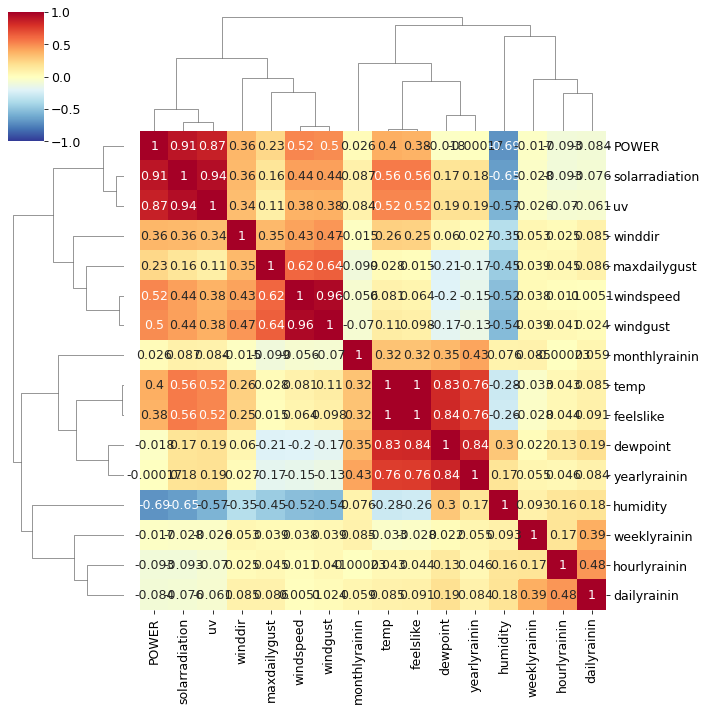

In [92]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12.5})

import seaborn as sns
sns.clustermap(corr(df), 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

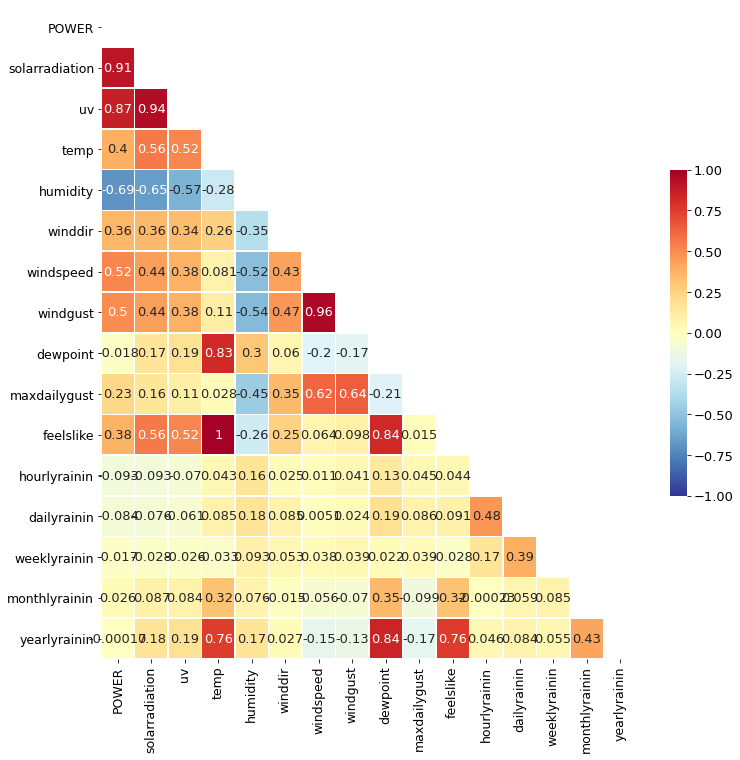

In [93]:
import matplotlib.pyplot as plt

# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(12,12) )
plt.rcParams.update({'font.size': 13})

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr(df), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(corr(df), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [94]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
def corr(df):
    corr_df = df.corr()
    corr_df = corr_df.apply(lambda x: round(x ,2))

    corr_df1 = corr_df.nlargest(df.shape[0], 'POWER')
    corr_df1 = corr_df1[list(corr_df1.index)]
    print(corr_df1.columns)
    return corr_df1
    
#display(corr(ds1))
display_side_by_side(corr(df).iloc[:,0:1],corr(ds1).iloc[:,0:1],corr(ds2).iloc[:,0:1],corr(ds3).iloc[:,0:1],corr(ds4).iloc[:,0:1])

print("corr 0.5이상인 피쳐들 순서는 유사함.\n밤시간 제거한 데이터셋에서 corr이 낮아지는 경향을 보임, \n모델 같이 돌려서 테스트 해볼 것")

Index(['POWER', 'solarradiation', 'uv', 'windspeed', 'windgust', 'temp',
       'feelslike', 'winddir', 'maxdailygust', 'monthlyrainin', 'yearlyrainin',
       'dewpoint', 'weeklyrainin', 'dailyrainin', 'hourlyrainin', 'humidity'],
      dtype='object')
Index(['POWER', 'solarradiation', 'uv', 'windspeed', 'windgust', 'temp',
       'feelslike', 'winddir', 'maxdailygust', 'monthlyrainin', 'yearlyrainin',
       'dewpoint', 'weeklyrainin', 'dailyrainin', 'hourlyrainin', 'humidity'],
      dtype='object')
Index(['POWER', 'solarradiation', 'uv', 'windspeed', 'windgust', 'temp',
       'feelslike', 'winddir', 'maxdailygust', 'monthlyrainin', 'yearlyrainin',
       'weeklyrainin', 'dewpoint', 'dailyrainin', 'hourlyrainin', 'humidity'],
      dtype='object')
Index(['POWER', 'solarradiation', 'uv', 'windspeed', 'windgust', 'temp',
       'feelslike', 'winddir', 'maxdailygust', 'monthlyrainin', 'yearlyrainin',
       'dewpoint', 'weeklyrainin', 'dailyrainin', 'hourlyrainin', 'humidity'],
      

,POWER
POWER,1.00
solarradiation,0.91
uv,0.87
windspeed,0.52
windgust,0.50
temp,0.40
feelslike,0.38
winddir,0.36
maxdailygust,0.23
monthlyrainin,0.03


corr 0.5이상인 피쳐들 순서는 유사함.
밤시간 제거한 데이터셋에서 corr이 낮아지는 경향을 보임, 
모델 같이 돌려서 테스트 해볼 것


In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

s=df.copy()
s = s.interpolate(method='slinear')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    s[s.columns[1:]].values, i) for i in range(s[s.columns[1:]].shape[1])]
vif["features"] = s.columns[1:]

print("*** VIF-> 값 큰 피쳐들 -> corr보고 쳐내기 or 수식으로 합치기 고려 => temp & feelslike")
display(vif)

*** VIF-> 값 큰 피쳐들 -> corr보고 쳐내기 or 수식으로 합치기 고려 => temp & feelslike


,VIF Factor,features
0,12.145476,POWER
1,25.920287,solarradiation
2,14.752588,uv
3,1111.270510,temp
4,10.626287,humidity
5,15.166006,winddir
6,23.496572,windspeed
7,27.192222,windgust
8,15.762497,dewpoint
9,5.810498,maxdailygust


In [96]:
def corr(df):
    corr_df = df.corr()
    corr_df = corr_df.apply(lambda x: round(x ,2))

    corr_df1 = corr_df.nlargest(df.shape[0], 'POWER')
    corr_df1 = corr_df1[list(corr_df1.index)]
    display(corr_df1)
    
corr(ds1)
corr(ds2)
corr(ds3)
corr(ds4)

,POWER,solarradiation,uv,windspeed,windgust,temp,feelslike,winddir,maxdailygust,monthlyrainin,yearlyrainin,dewpoint,weeklyrainin,dailyrainin,hourlyrainin,humidity
POWER,1.00,0.91,0.87,0.52,0.50,0.40,0.38,0.36,0.23,0.03,0.00,-0.02,-0.02,-0.08,-0.09,-0.69
solarradiation,0.91,1.00,0.94,0.44,0.44,0.56,0.56,0.36,0.16,0.09,0.18,0.17,-0.03,-0.08,-0.09,-0.65
uv,0.87,0.94,1.00,0.38,0.38,0.52,0.52,0.34,0.11,0.08,0.19,0.19,-0.03,-0.06,-0.07,-0.57
windspeed,0.52,0.44,0.38,1.00,0.96,0.08,0.07,0.43,0.62,-0.06,-0.15,-0.20,0.04,0.01,0.01,-0.52
windgust,0.50,0.44,0.38,0.96,1.00,0.12,0.10,0.47,0.64,-0.07,-0.13,-0.17,0.04,0.02,0.04,-0.53
temp,0.40,0.56,0.52,0.08,0.12,1.00,1.00,0.26,0.03,0.32,0.76,0.83,-0.03,0.08,0.04,-0.28
feelslike,0.38,0.56,0.52,0.07,0.10,1.00,1.00,0.25,0.01,0.32,0.76,0.83,-0.03,0.09,0.04,-0.26
winddir,0.36,0.36,0.34,0.43,0.47,0.26,0.25,1.00,0.35,-0.02,0.03,0.06,0.05,0.08,0.03,-0.35
maxdailygust,0.23,0.16,0.11,0.62,0.64,0.03,0.01,0.35,1.00,-0.10,-0.18,-0.21,0.04,0.09,0.05,-0.45
monthlyrainin,0.03,0.09,0.08,-0.06,-0.07,0.32,0.32,-0.02,-0.10,1.00,0.43,0.35,0.09,0.06,-0.00,0.07


,POWER,solarradiation,uv,windspeed,windgust,temp,feelslike,winddir,maxdailygust,monthlyrainin,yearlyrainin,weeklyrainin,dewpoint,dailyrainin,hourlyrainin,humidity
POWER,1.00,0.87,0.81,0.49,0.48,0.34,0.32,0.28,0.25,0.04,0.00,-0.02,-0.07,-0.13,-0.15,-0.67
solarradiation,0.87,1.00,0.92,0.38,0.39,0.59,0.58,0.26,0.15,0.14,0.28,-0.04,0.21,-0.12,-0.15,-0.61
uv,0.81,0.92,1.00,0.30,0.31,0.53,0.53,0.24,0.06,0.13,0.28,-0.04,0.23,-0.09,-0.11,-0.49
windspeed,0.49,0.38,0.30,1.00,0.96,0.02,-0.00,0.30,0.70,-0.05,-0.15,0.01,-0.24,-0.05,-0.03,-0.48
windgust,0.48,0.39,0.31,0.96,1.00,0.05,0.03,0.33,0.73,-0.06,-0.12,0.01,-0.21,-0.03,0.01,-0.49
temp,0.34,0.59,0.53,0.02,0.05,1.00,1.00,0.16,-0.00,0.33,0.77,-0.05,0.81,0.05,0.01,-0.27
feelslike,0.32,0.58,0.53,-0.00,0.03,1.00,1.00,0.15,-0.02,0.33,0.78,-0.04,0.82,0.06,0.01,-0.25
winddir,0.28,0.26,0.24,0.30,0.33,0.16,0.15,1.00,0.27,0.03,0.06,0.06,0.03,0.03,-0.03,-0.22
maxdailygust,0.25,0.15,0.06,0.70,0.73,-0.00,-0.02,0.27,1.00,-0.11,-0.19,0.02,-0.25,0.05,0.04,-0.46
monthlyrainin,0.04,0.14,0.13,-0.05,-0.06,0.33,0.33,0.03,-0.11,1.00,0.42,0.08,0.35,0.04,-0.01,0.05


,POWER,solarradiation,uv,windspeed,windgust,temp,feelslike,winddir,maxdailygust,monthlyrainin,yearlyrainin,dewpoint,weeklyrainin,dailyrainin,hourlyrainin,humidity
POWER,1.00,0.91,0.87,0.52,0.50,0.40,0.38,0.36,0.23,0.03,0.00,-0.02,-0.02,-0.08,-0.09,-0.69
solarradiation,0.91,1.00,0.94,0.44,0.44,0.56,0.56,0.36,0.16,0.09,0.18,0.17,-0.03,-0.08,-0.09,-0.65
uv,0.87,0.94,1.00,0.38,0.38,0.52,0.52,0.34,0.11,0.08,0.19,0.19,-0.03,-0.06,-0.07,-0.57
windspeed,0.52,0.44,0.38,1.00,0.96,0.08,0.07,0.43,0.62,-0.06,-0.15,-0.20,0.04,0.01,0.01,-0.52
windgust,0.50,0.44,0.38,0.96,1.00,0.12,0.10,0.47,0.64,-0.07,-0.13,-0.17,0.04,0.02,0.04,-0.53
temp,0.40,0.56,0.52,0.08,0.12,1.00,1.00,0.26,0.03,0.32,0.76,0.83,-0.03,0.08,0.04,-0.28
feelslike,0.38,0.56,0.52,0.07,0.10,1.00,1.00,0.25,0.01,0.32,0.76,0.84,-0.03,0.09,0.04,-0.26
winddir,0.36,0.36,0.34,0.43,0.47,0.26,0.25,1.00,0.35,-0.01,0.03,0.06,0.05,0.09,0.03,-0.35
maxdailygust,0.23,0.16,0.11,0.62,0.64,0.03,0.01,0.35,1.00,-0.10,-0.17,-0.21,0.04,0.09,0.05,-0.45
monthlyrainin,0.03,0.09,0.08,-0.06,-0.07,0.32,0.32,-0.01,-0.10,1.00,0.43,0.35,0.09,0.06,-0.00,0.07


,POWER,solarradiation,uv,windspeed,windgust,temp,feelslike,winddir,maxdailygust,monthlyrainin,yearlyrainin,weeklyrainin,dewpoint,dailyrainin,hourlyrainin,humidity
POWER,1.00,0.87,0.81,0.49,0.48,0.34,0.32,0.28,0.25,0.04,0.00,-0.02,-0.07,-0.13,-0.15,-0.67
solarradiation,0.87,1.00,0.92,0.38,0.39,0.59,0.58,0.25,0.15,0.14,0.28,-0.04,0.21,-0.12,-0.15,-0.61
uv,0.81,0.92,1.00,0.30,0.31,0.53,0.53,0.24,0.06,0.13,0.28,-0.04,0.23,-0.09,-0.11,-0.49
windspeed,0.49,0.38,0.30,1.00,0.96,0.02,-0.00,0.30,0.70,-0.05,-0.15,0.01,-0.24,-0.05,-0.02,-0.48
windgust,0.48,0.39,0.31,0.96,1.00,0.05,0.03,0.33,0.73,-0.06,-0.12,0.01,-0.21,-0.03,0.01,-0.49
temp,0.34,0.59,0.53,0.02,0.05,1.00,1.00,0.16,-0.00,0.33,0.77,-0.05,0.81,0.05,0.01,-0.27
feelslike,0.32,0.58,0.53,-0.00,0.03,1.00,1.00,0.15,-0.02,0.33,0.78,-0.04,0.82,0.06,0.01,-0.25
winddir,0.28,0.25,0.24,0.30,0.33,0.16,0.15,1.00,0.27,0.03,0.06,0.06,0.03,0.04,-0.03,-0.22
maxdailygust,0.25,0.15,0.06,0.70,0.73,-0.00,-0.02,0.27,1.00,-0.11,-0.18,0.02,-0.25,0.05,0.04,-0.46
monthlyrainin,0.04,0.14,0.13,-0.05,-0.06,0.33,0.33,0.03,-0.11,1.00,0.43,0.08,0.35,0.04,-0.01,0.05


In [97]:
df_temp = df.copy()

In [98]:
df = df_temp.copy()

In [99]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d%H')
df.index = df['DATE']
df['DATE'] = df['DATE'].dt.strftime('%H')
df = df.rename(columns={'DATE': 'hour'})

display(df)
df.to_csv(SAVE_TOTAL_DIR + 'dataset0_'+START_DATE+'_'+END_DATE+'_(index_DATE).csv', header=True, encoding='CP949')

,hour,POWER,solarradiation,uv,temp,humidity,winddir,windspeed,windgust,dewpoint,maxdailygust,feelslike,hourlyrainin,dailyrainin,weeklyrainin,monthlyrainin,yearlyrainin
DATE,,,,,,,,,,,,,,,,,
2021-01-29 00:00:00,00,0.0,0.00,0.0,-4.722,77.0,331.0,3.979,7.778,-8.128,11.086,-7.339,0.0,0.000,12.192,12.192,12.192
2021-01-29 01:00:00,01,0.0,0.00,0.0,-4.889,85.0,353.0,4.604,6.705,-7.394,11.086,-5.389,0.0,0.000,12.192,12.192,12.192
2021-01-29 02:00:00,02,0.0,0.00,0.0,-5.278,78.0,358.0,4.381,8.896,-8.500,11.086,-5.278,0.0,0.000,12.192,12.192,12.192
2021-01-29 03:00:00,03,0.0,0.00,0.0,-5.500,78.0,357.0,4.113,5.498,-8.717,11.086,-5.500,0.0,0.000,12.192,12.192,12.192
2021-01-29 04:00:00,04,0.0,0.00,0.0,-5.778,76.0,351.0,2.995,5.498,-9.317,11.086,-9.194,0.0,0.000,12.192,12.192,12.192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-04 19:00:00,19,0.0,15.58,0.0,21.722,96.0,305.0,0.000,0.000,20.883,6.705,22.433,0.0,6.604,6.604,120.904,802.386
2021-07-04 20:00:00,20,0.0,0.00,0.0,21.111,97.0,191.0,0.000,0.000,20.444,6.705,21.783,0.0,6.604,6.604,120.904,802.386
2021-07-04 21:00:00,21,0.0,0.00,0.0,20.611,97.0,233.0,0.000,0.000,20.117,6.705,21.261,0.0,6.604,6.604,120.904,802.386


17


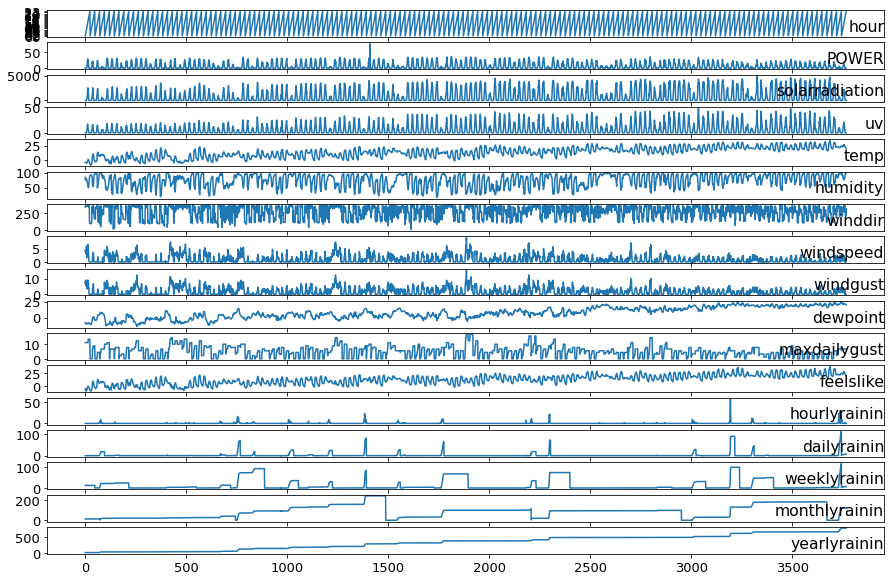

In [100]:
import matplotlib.pyplot as plt

values = df.values
print(df.shape[1])

# 각 컬럼을 plot
#plt.figure()
plt.figure(figsize=(15,10))
for col_idx in range(df.shape[1]):
    plt.subplot(df.shape[1], 1, col_idx+1)
    plt.plot(values[:, col_idx])
    
    plt.title(df.columns[col_idx], y=0, loc='right')
    
plt.show()

array([<AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>],
      dtype=object)

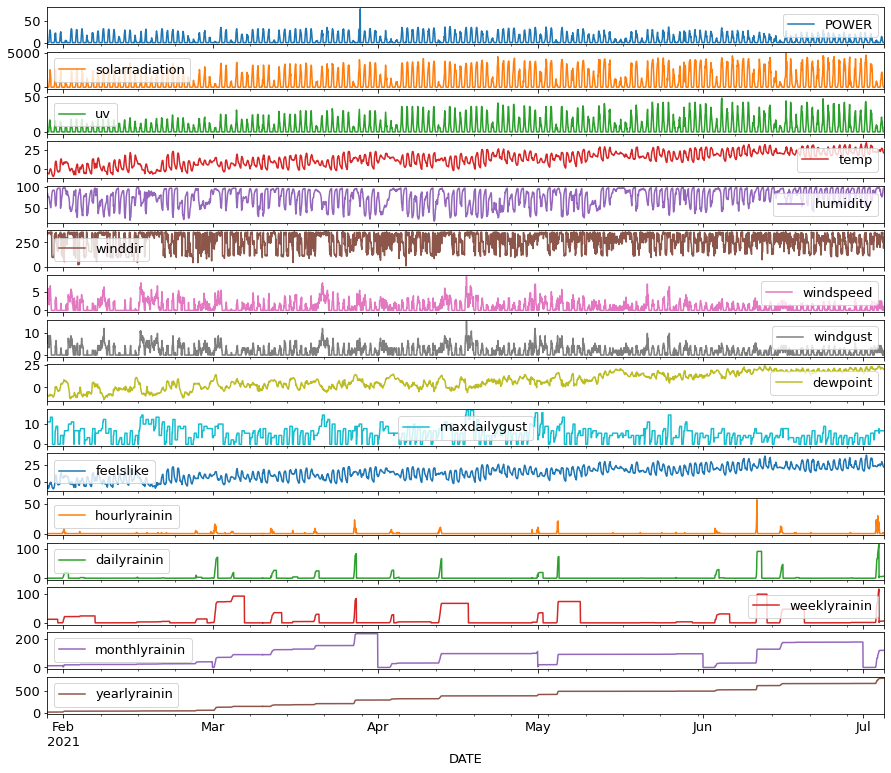

In [101]:
import pandas as pd 

df.plot(subplots=True, figsize=(15,13))

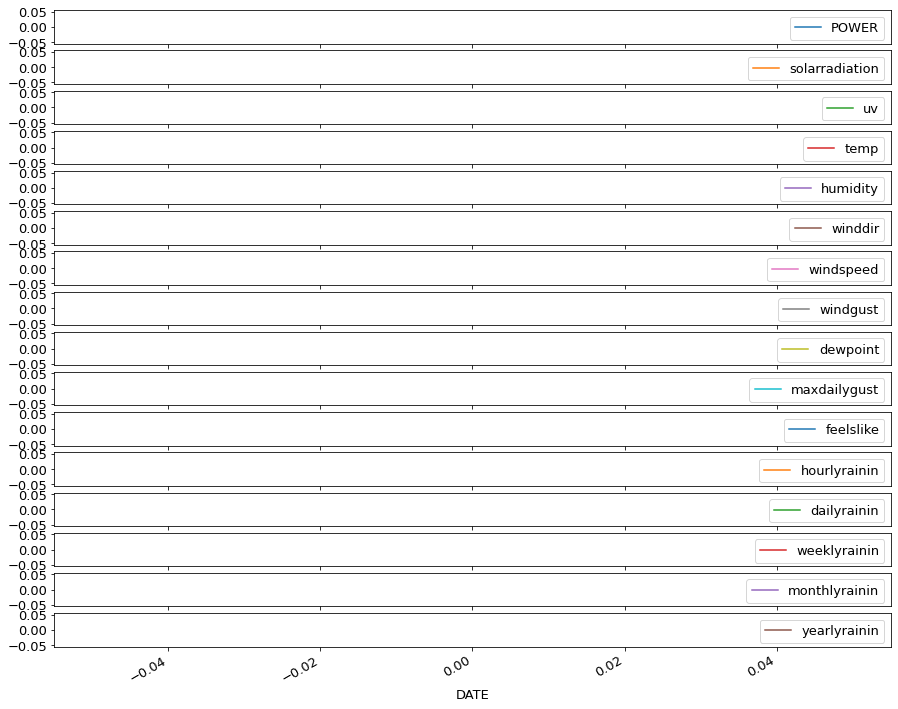

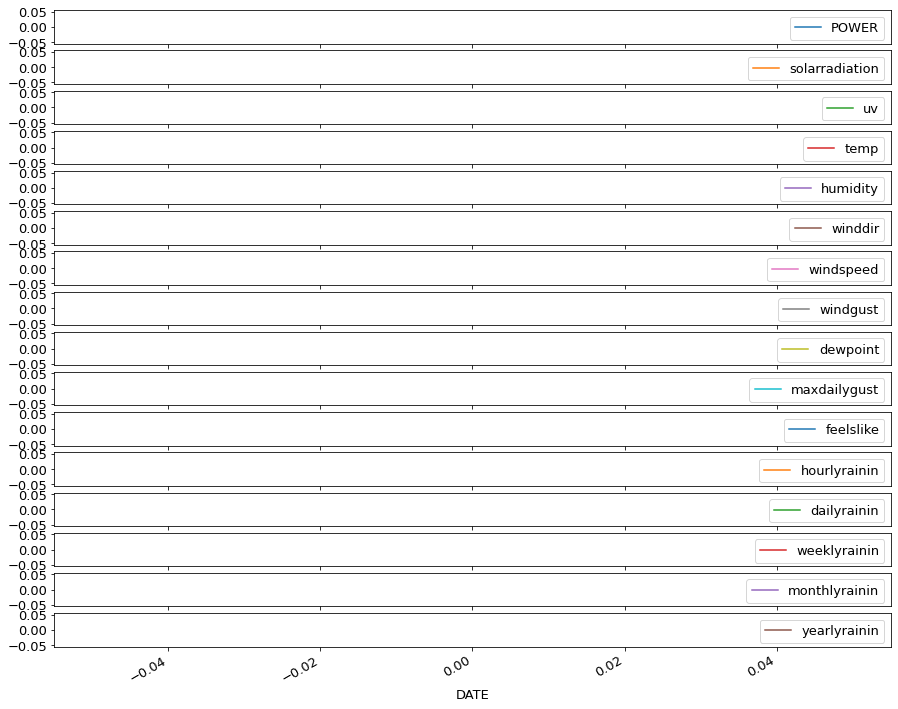

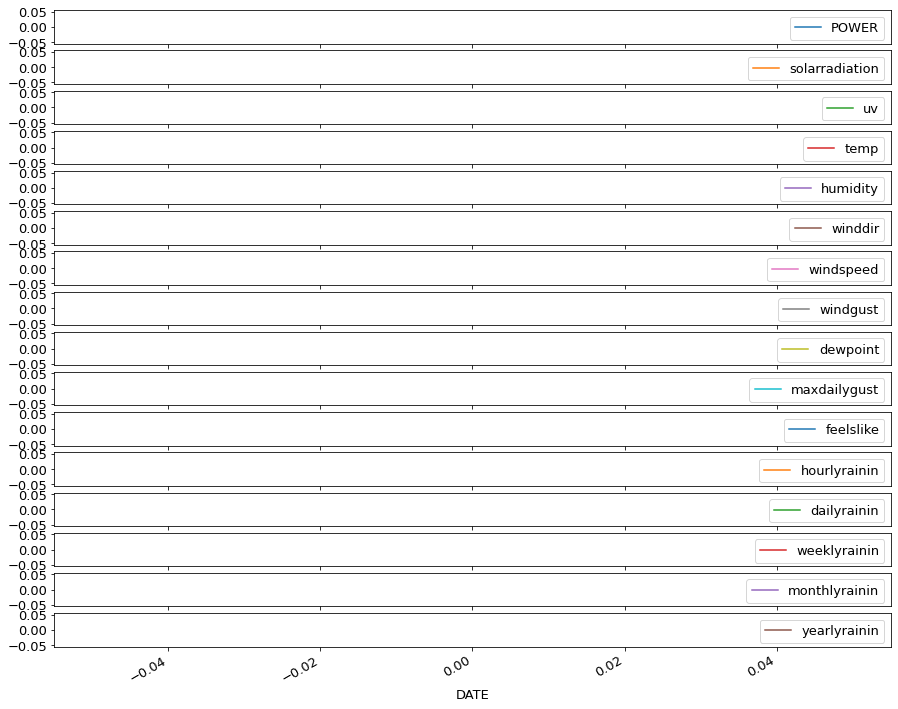

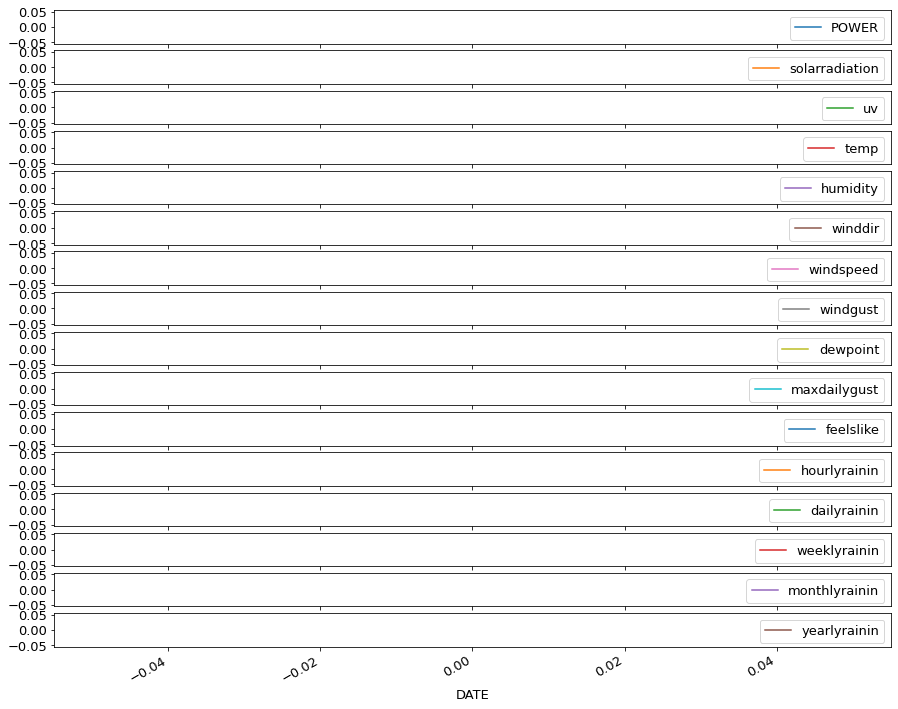

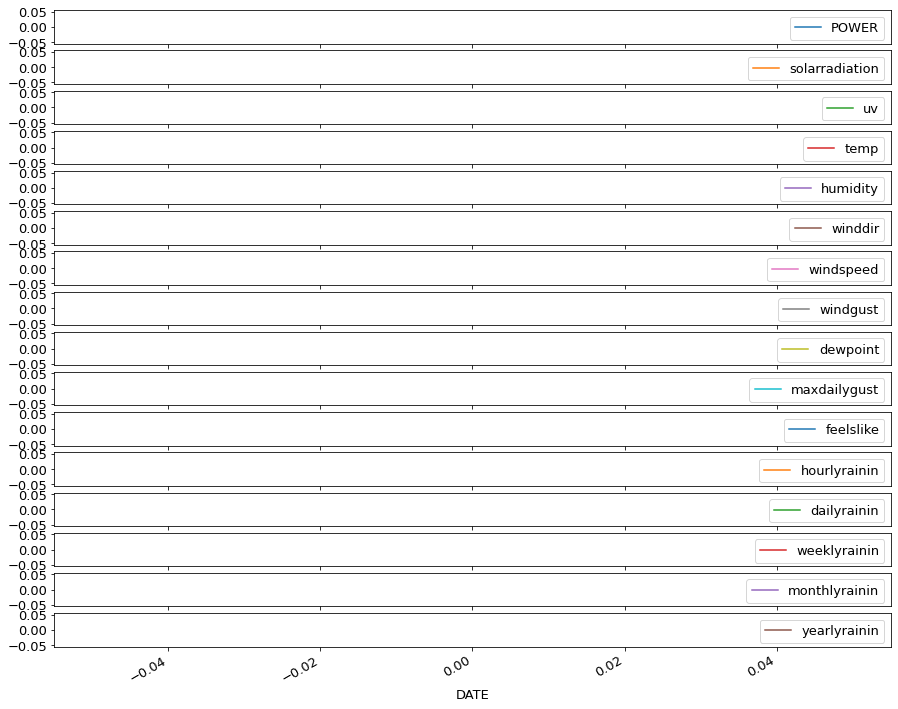

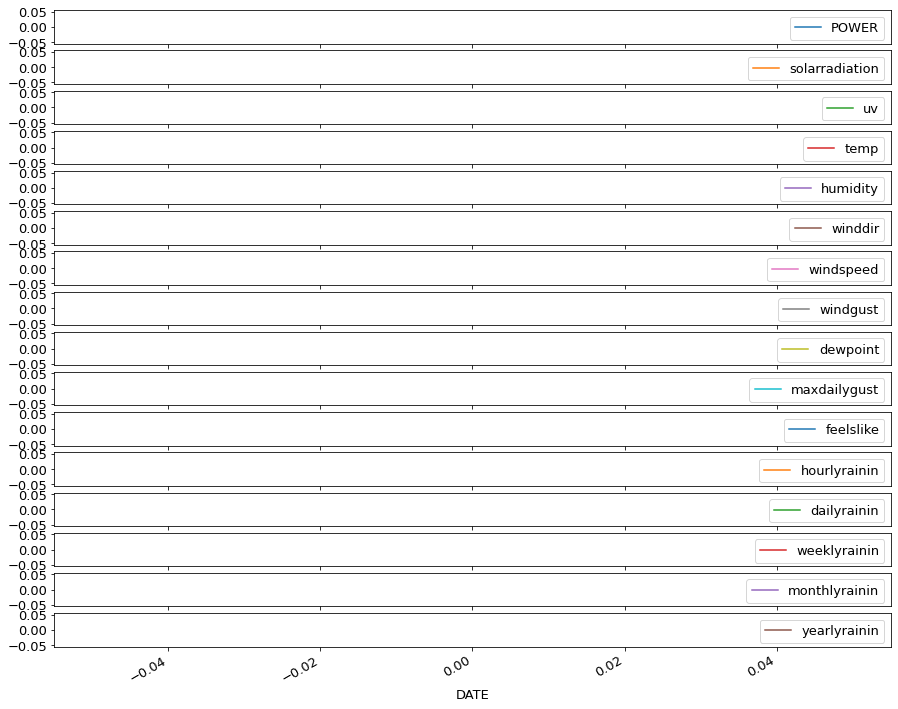

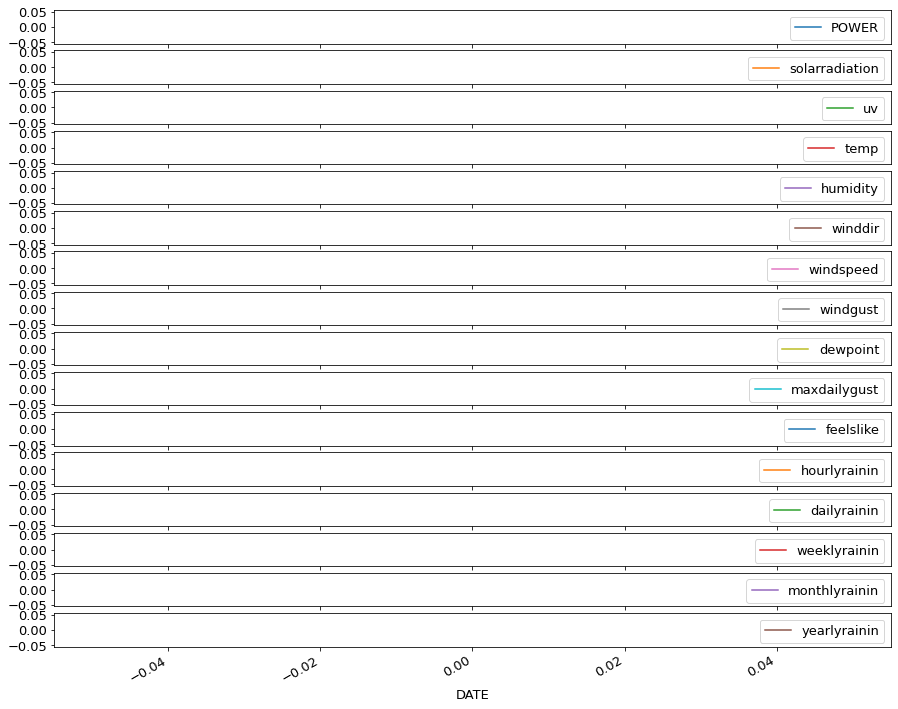

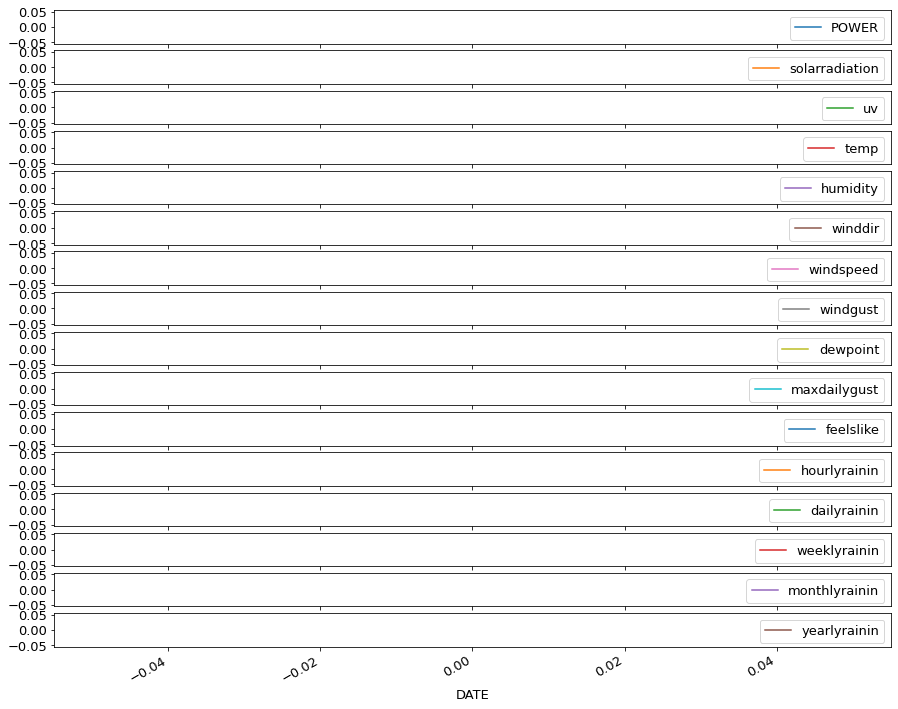

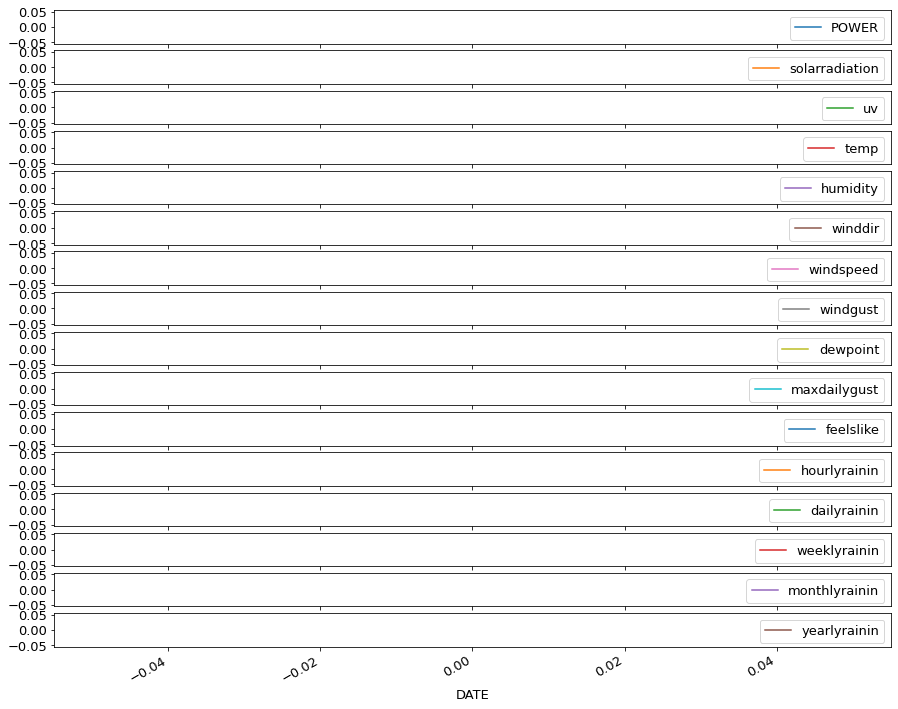

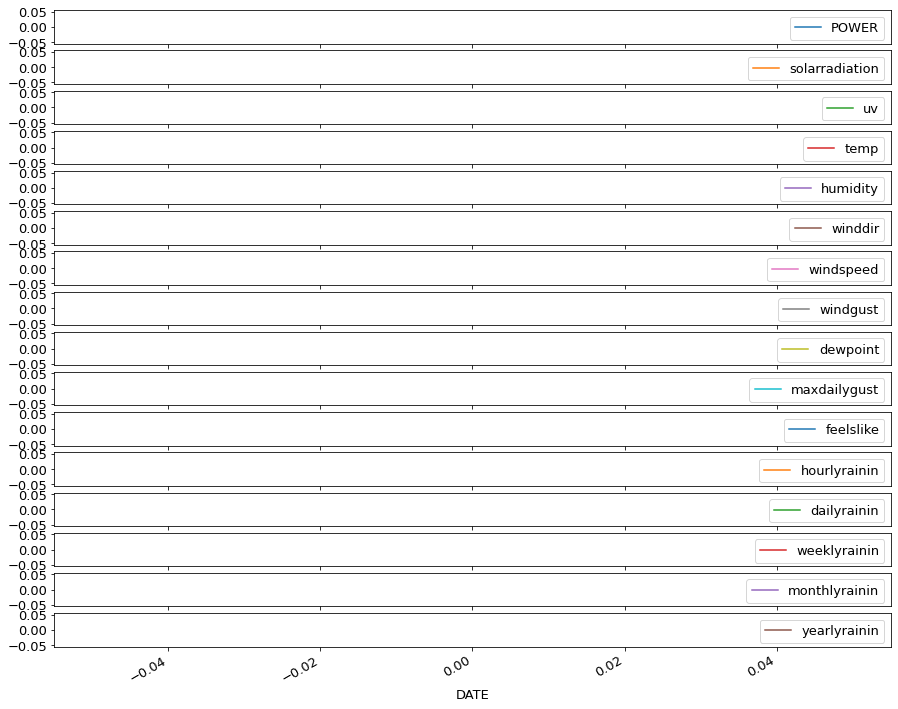

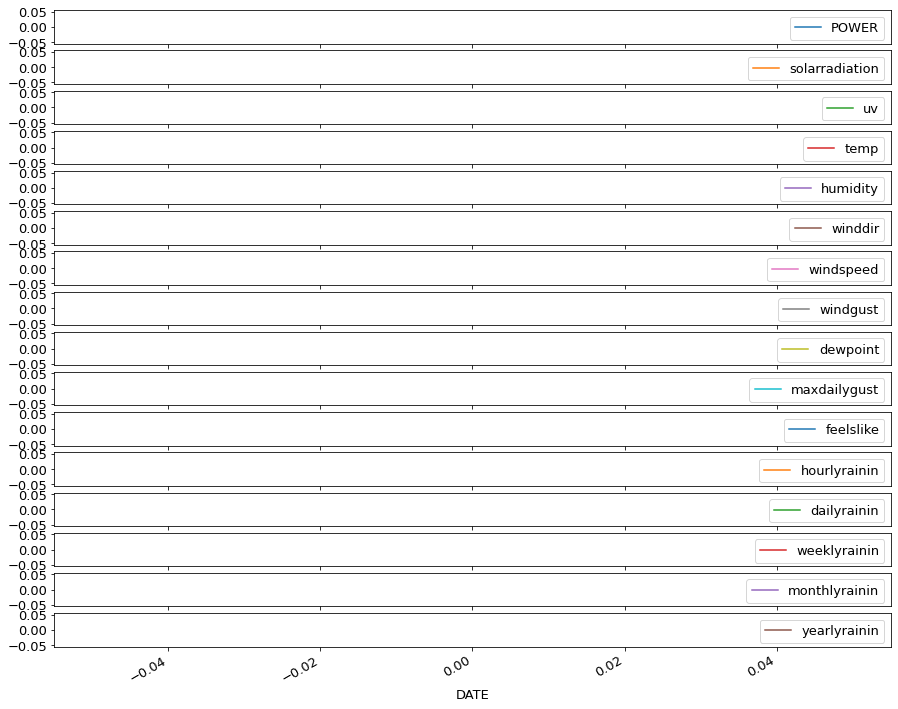

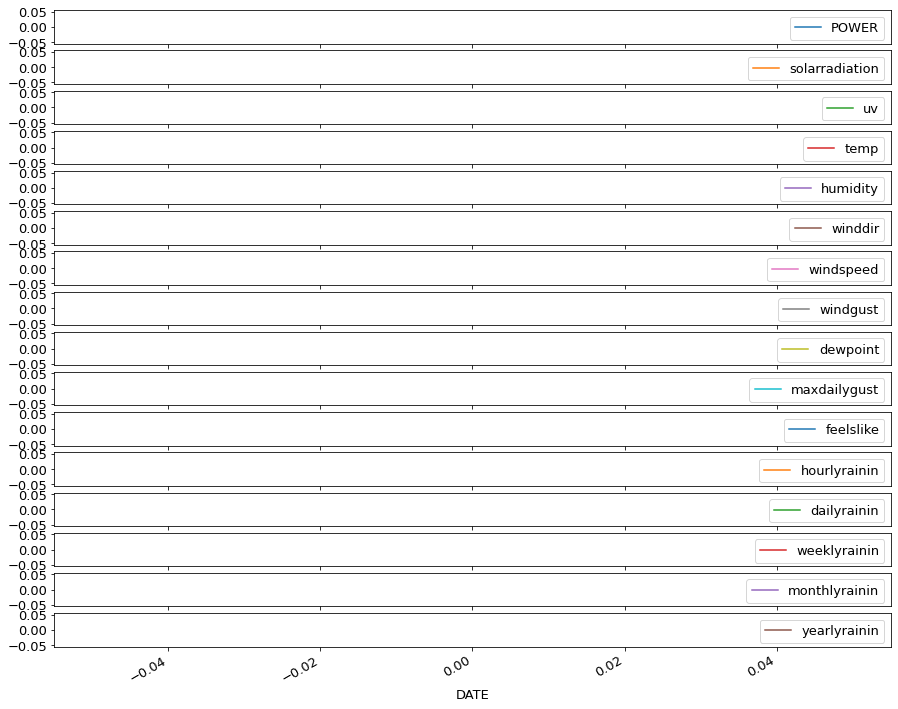

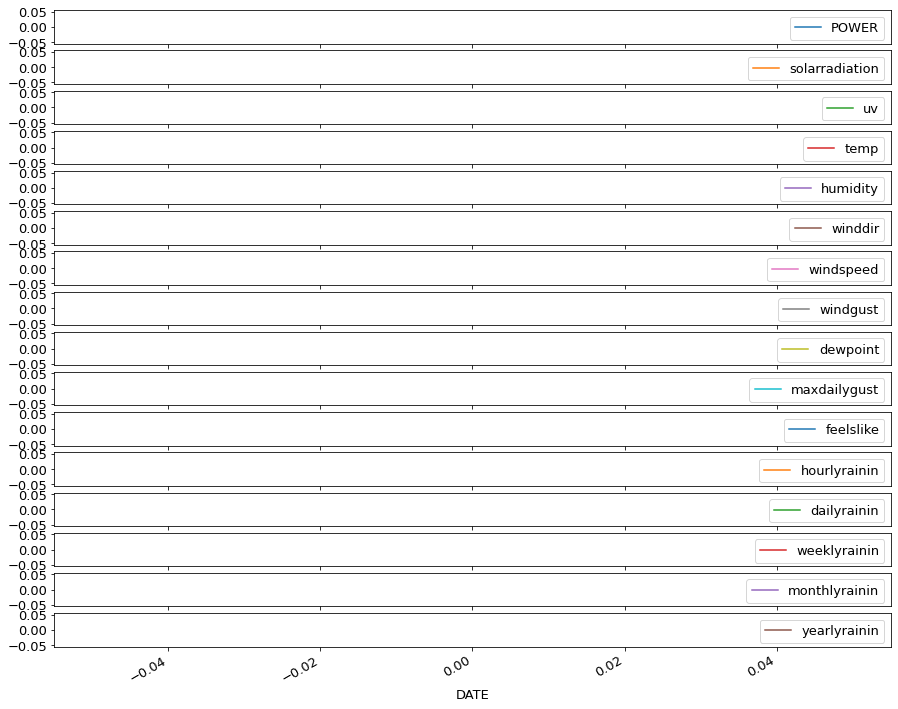

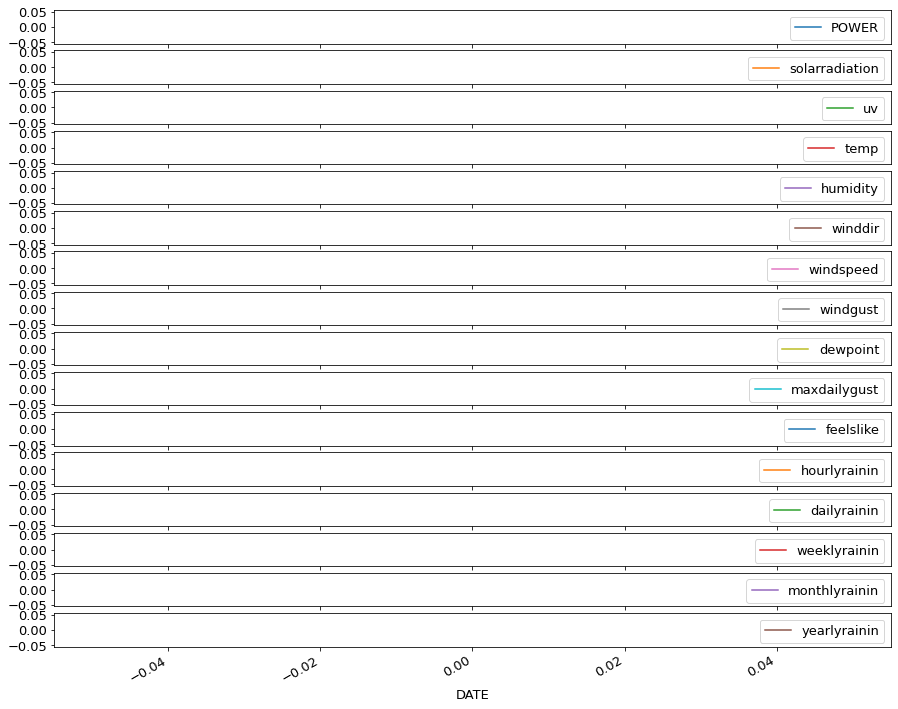

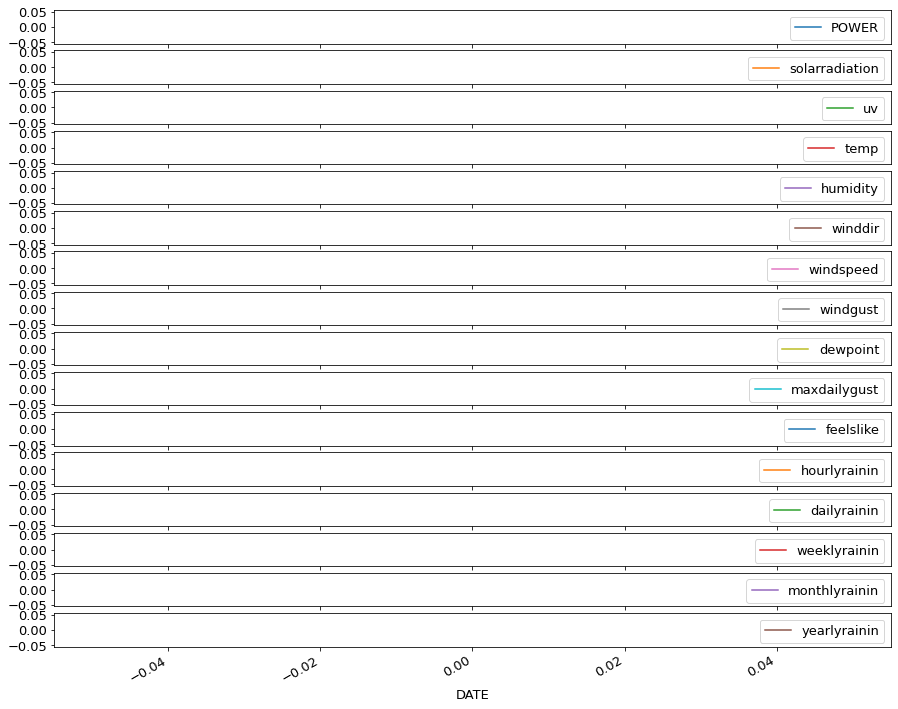

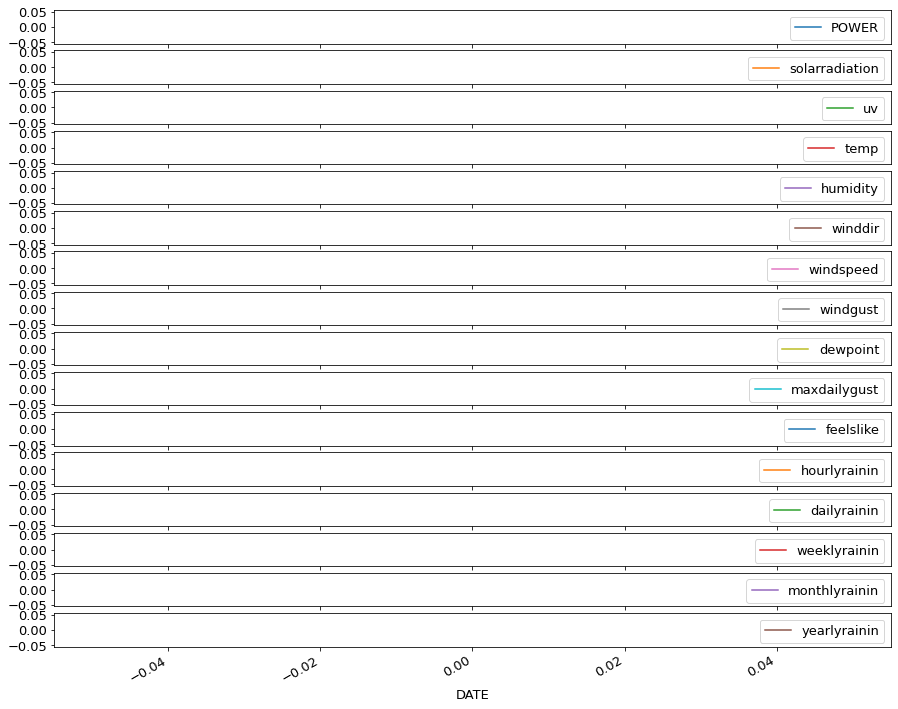

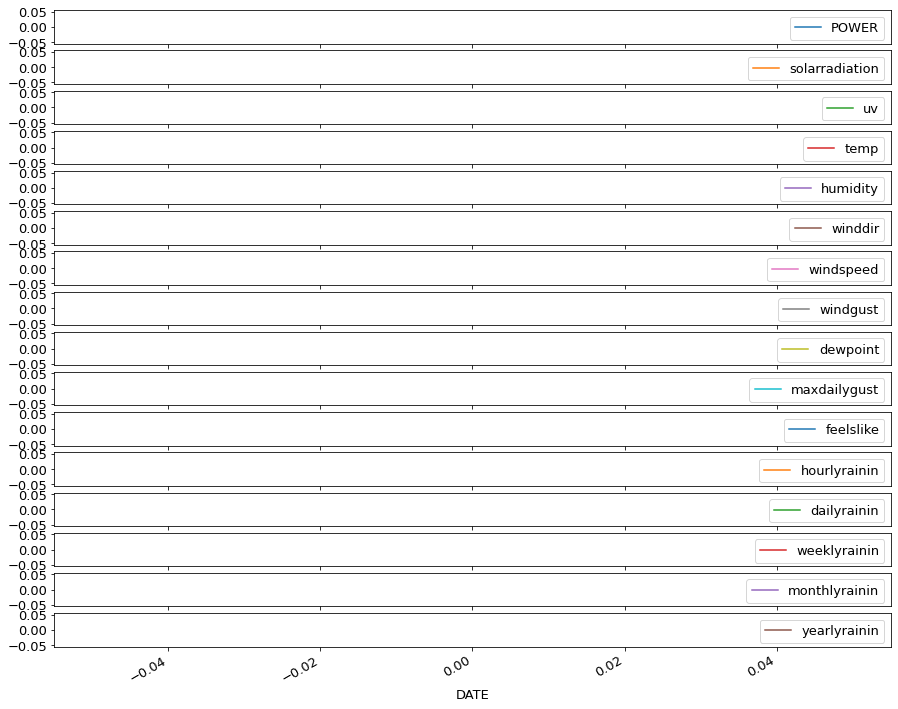

In [102]:
for i in range(df.shape[1]):
    #plot_features = df[plot_cols][:480]
    plot_features = df[i-480:i]
    _ = plot_features.plot(subplots=True,  figsize=(15,13))
    

In [83]:
'''
import pandas as pd 

features_selected = ['DATE', 'POWER', 'solarradiation', 'humidity', 'windspeed', 'windgust', 'temp', 'winddir' ]

df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d%H')
df = df[features_selected]

display(df)
df.index = df['DATE']
df.head()

df.plot(subplots=True)
'''

"\nimport pandas as pd \n\nfeatures_selected = ['DATE', 'POWER', 'solarradiation', 'humidity', 'windspeed', 'windgust', 'temp', 'winddir' ]\n\ndf['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d%H')\ndf = df[features_selected]\n\ndisplay(df)\ndf.index = df['DATE']\ndf.head()\n\ndf.plot(subplots=True)\n"